In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
import tqdm
import fitsio
import matplotlib.pyplot as plt
import healpy as hp
import glob
import hpgeom
import numpy as np
import galsim
import yaml
import requests

# from sim_match_tools import project_to_tile, sample_from_pixel
from montara.make_input_desgal import make_input_cosmos_cat

## Try to Adjust the COSMOS Catalog to get More Brighter Things

In [3]:
ratio_sim = """
18.20913, -0.87218
18.24124, -0.87216
18.28405, -0.87215
18.32686, -0.87462
18.36968, -0.87709
18.40179, -0.87708
18.42319, -0.75253
18.50882, -0.75250
18.61585, -0.81223
18.64796, -0.81221
18.69077, -0.81220
18.72288, -0.81218
18.75499, -0.83708
18.78710, -0.83706
18.80850, -0.83705
18.84061, -0.84700
18.88342, -0.84699
18.91553, -0.75731
18.94764, -0.75231
18.97975, -0.75230
19.02256, -0.69250
19.05467, -0.68751
19.09749, -0.68749
19.12959, -0.56792
19.16170, -0.56790
19.19381, -0.56789
19.21522, -0.54795
19.24733, -0.54794
19.29014, -0.54792
19.32225, -0.45824
19.35436, -0.45823
19.39717, -0.45821
19.42928, -0.45820
19.46139, -0.59268
19.50420, -0.59267
19.53631, -0.53287
19.56842, -0.53286
19.60053, -0.53285
19.62194, -0.48800
19.65404, -0.48799
19.69686, -0.48797
19.72897, -0.36840
19.76108, -0.36839
19.80389, -0.36837
19.83600, -0.36836
19.86811, -0.43310
19.90022, -0.43309
19.92162, -0.38825
19.95373, -0.38823
19.98584, -0.38822
20.02865, -0.37326
20.06076, -0.36826
20.10357, -0.36824
20.14639, -0.36823
20.18920, -0.36821
20.22131, -0.36820
20.24271, -0.29844
20.27482, -0.29843
20.30693, -0.29842
20.32834, -0.25357
20.36045, -0.24360
20.40326, -0.24358
20.43537, -0.20371
20.46748, -0.20370
20.51029, -0.20368
20.54240, -0.20367
20.57451, -0.32321
20.60662, -0.32320
20.62802, -0.26839
20.66013, -0.26838
20.70295, -0.26836
20.73506, -0.26835
20.76716, -0.34804
20.80998, -0.34802
20.84209, -0.26830
20.87420, -0.26829
20.91701, -0.26827
20.94912, -0.23339
20.97052, -0.23338
21.01334, -0.23336
21.03474, -0.21841
21.06685, -0.21839
21.10966, -0.21837
21.14177, -0.16356
21.17388, -0.16355
21.21669, -0.16353
21.24880, -0.16352
21.28091, -0.23325
21.32372, -0.23323
21.35583, -0.16846
21.38794, -0.16844
21.42005, -0.16843
21.44146, -0.16842
21.47357, -0.20826
21.51638, -0.20824
21.54849, -0.18830
21.58060, -0.18829
21.62341, -0.18827
21.65552, -0.18826
21.68763, -0.20817
21.71974, -0.20815
21.74114, -0.20815
21.77325, -0.21809
21.81607, -0.21808
21.84817, -0.17323
21.88028, -0.17322
21.92310, -0.17320
21.95521, -0.15824
21.97661, -0.15823
22.03013, -0.15821
22.06224, -0.15819
22.09435, -0.19803
22.12645, -0.19802
22.14786, -0.19801
22.17997, -0.22291
22.22278, -0.22289
22.25489, -0.18302
22.28700, -0.18301
22.32981, -0.18299
22.36192, -0.13316
22.39403, -0.13315
22.42614, -0.13313
22.44755, -0.11818
22.47966, -0.11817
22.52247, -0.11815
22.55458, -0.10319
22.58669, -0.10318
22.62950, -0.10316
22.66161, -0.09318
22.69372, -0.09317
22.73653, -0.09315
22.76864, -0.07819
22.80075, -0.07818
22.83286, -0.07817
22.85426, -0.03332
22.88637, -0.03331
22.92919, -0.03329
22.97200, -0.03576
23.03622, -0.03823
23.06833, -0.01829
23.10043, -0.01827
23.14325, -0.01826
23.17536, -0.00828
23.20747, -0.00827
23.25028, -0.00825
23.29309, -0.00325
23.33590, -0.00323
23.36801, 0.01671
23.40012, 0.01672
23.44293, 0.01674
23.47504, 0.01675
23.50715, 0.00680
23.53926, 0.00682
23.56067, 0.03672
23.59278, 0.03673
23.63559, 0.03675
23.66770, 0.07163
23.69981, 0.07165
23.74262, 0.07166
23.77473, 0.09160
23.80684, 0.09162
23.84965, 0.09164
23.88176, 0.12652
23.91387, 0.12653
23.94598, 0.12655
23.96738, 0.15644
23.98879, 0.15645
24.04230, 0.15648
24.07441, 0.18638
24.10652, 0.18639
24.14934, 0.18641
24.18144, 0.20635
24.21355, 0.20636
24.24566, 0.20638
24.26707, 0.20639
24.29918, 0.19644
24.34199, 0.19646
24.37410, 0.23632
24.40621, 0.23633
24.44902, 0.23635
24.49183, 0.23637
24.53465, 0.23639
24.57746, 0.23641
24.62027, 0.23642
24.66308, 0.23893
24.70590, 0.24144
24.74871, 0.24146
24.78082, 0.24147
"""

data = np.loadtxt(ratio_sim.split('\n'), delimiter=',', dtype=[("mag_i", "f8"), ("ratio", "f8")])

In [4]:
bes = np.array([17.        , 17.1010101 , 17.2020202 , 17.3030303 , 17.4040404 ,
        17.50505051, 17.60606061, 17.70707071, 17.80808081, 17.90909091,
        18.01010101, 18.11111111, 18.21212121, 18.31313131, 18.41414141,
        18.51515152, 18.61616162, 18.71717172, 18.81818182, 18.91919192,
        19.02020202, 19.12121212, 19.22222222, 19.32323232, 19.42424242,
        19.52525253, 19.62626263, 19.72727273, 19.82828283, 19.92929293,
        20.03030303, 20.13131313, 20.23232323, 20.33333333, 20.43434343,
        20.53535354, 20.63636364, 20.73737374, 20.83838384, 20.93939394,
        21.04040404, 21.14141414, 21.24242424, 21.34343434, 21.44444444,
        21.54545455, 21.64646465, 21.74747475, 21.84848485, 21.94949495,
        22.05050505, 22.15151515, 22.25252525, 22.35353535, 22.45454545,
        22.55555556, 22.65656566, 22.75757576, 22.85858586, 22.95959596,
        23.06060606, 23.16161616, 23.26262626, 23.36363636, 23.46464646,
        23.56565657, 23.66666667, 23.76767677, 23.86868687, 23.96969697,
        24.07070707, 24.17171717, 24.27272727, 24.37373737, 24.47474747,
        24.57575758, 24.67676768, 24.77777778, 24.87878788, 24.97979798,
        25.08080808, 25.18181818, 25.28282828, 25.38383838, 25.48484848,
        25.58585859, 25.68686869, 25.78787879, 25.88888889, 25.98989899,
        26.09090909, 26.19191919, 26.29292929, 26.39393939, 26.49494949,
        26.5959596 , 26.6969697 , 26.7979798 , 26.8989899 , 27.        ])

sims = np.array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       8.07653809e-01, 1.03841204e+00, 2.76911745e+00, 0.00000000e+00,
       3.28831880e+00, 3.51904902e+00, 4.03825037e+00, 7.90348343e+00,
       1.18840769e+01, 1.96721345e+01, 2.39988747e+01, 3.31714724e+01,
       2.85563451e+01, 3.74982499e+01, 4.64977089e+01, 6.47854901e+01,
       6.50160896e+01, 7.85731871e+01, 9.06301973e+01, 1.00091537e+02,
       1.23801642e+02, 1.46993161e+02, 1.70588093e+02, 1.58357776e+02,
       1.87375618e+02, 1.82875964e+02, 2.23258719e+02, 2.55103150e+02,
       2.82505751e+02, 3.29292229e+02, 3.26580517e+02, 3.82481666e+02,
       3.91481377e+02, 4.32902619e+02, 4.53613138e+02, 4.79573374e+02,
       5.43608876e+02, 5.89645134e+02, 6.00894210e+02, 6.19989925e+02,
       6.89274902e+02, 7.75117198e+02, 8.36555984e+02, 8.97419462e+02,
       9.57530020e+02, 1.02329796e+03, 1.12731201e+03, 1.18107740e+03,
       1.27072897e+03, 1.34612819e+03, 1.42331749e+03, 1.51158183e+03,
       1.54908047e+03, 1.61080868e+03, 1.63307621e+03, 1.54544540e+03,
       1.38679854e+03, 1.15292516e+03, 8.91477507e+02, 6.40238853e+02,
       4.25345497e+02, 2.84179583e+02, 1.78838068e+02, 1.11513957e+02,
       2.06529084e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

mdet = np.array([5.31467170e-02, 8.93317158e-02, 1.32527558e-01, 2.33619398e-01,
       3.80620956e-01, 5.78959981e-01, 8.60298346e-01, 1.24589474e+00,
       1.88297687e+00, 2.59989216e+00, 3.64337707e+00, 4.93902618e+00,
       6.63655493e+00, 8.69141055e+00, 1.12478807e+01, 1.42643527e+01,
       1.78923511e+01, 2.21985921e+01, 2.71294767e+01, 3.25963515e+01,
       3.87952941e+01, 4.57572879e+01, 5.33617916e+01, 6.18207135e+01,
       7.07400895e+01, 8.06717409e+01, 9.14770339e+01, 1.02975270e+02,
       1.15674847e+02, 1.29392806e+02, 1.44233405e+02, 1.60095778e+02,
       1.76902579e+02, 1.95252670e+02, 2.14882806e+02, 2.36126567e+02,
       2.58012837e+02, 2.82811321e+02, 3.07627220e+02, 3.35011348e+02,
       3.64138915e+02, 3.94435032e+02, 4.27401827e+02, 4.61542373e+02,
       4.98245496e+02, 5.35125925e+02, 5.76114483e+02, 6.17444762e+02,
       6.60966270e+02, 7.05790437e+02, 7.52261474e+02, 8.01137909e+02,
       8.50088749e+02, 9.00238669e+02, 9.50870981e+02, 1.00451298e+03,
       1.05906842e+03, 1.11534288e+03, 1.17368124e+03, 1.23608680e+03,
       1.30036945e+03, 1.36586565e+03, 1.43148127e+03, 1.49470867e+03,
       1.54496375e+03, 1.56250195e+03, 1.52974118e+03, 1.42174140e+03,
       1.23698916e+03, 1.00098811e+03, 7.53826701e+02, 5.32129129e+02,
       3.56857589e+02, 2.30246278e+02, 1.45224874e+02, 9.04034702e+01,
       1.67052570e+01, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00])

In [5]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]
hcardinal = np.histogram(cardinal["TMAG"][:, 2], bins=bes, density=True)[0]


array([-3.05005992e+01,  1.29795854e-01, -1.39023858e-04,  4.33811478e-08])

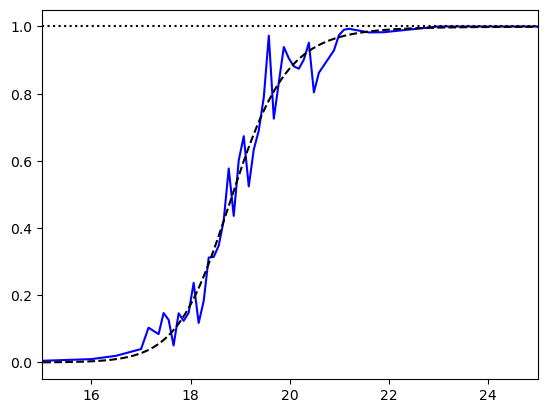

In [6]:
from scipy.optimize import curve_fit

def ratio_mag(mag, *coeffs):
    if len(coeffs) == 0:
        coeffs = [-3.05005992e+01,  1.29795854e-01, -1.39023858e-04,  4.33811478e-08]
    x = mag
    poly = np.zeros_like(x)
    for i, c in enumerate(coeffs):
        poly += c * x**(2*i)
    return 1.0 / (1.0 + np.exp(-poly))

mag = ((bes[:-1] + bes[1:])/2)
ratio = hcosmos / hcardinal
msk = (hcosmos > 0) & (hcardinal > 0) & (ratio <= 1.0) & (mag < 22)
ratio = hcosmos[msk] / hcardinal[msk]
mag = mag[msk]

fmag = np.concatenate([
    np.linspace(1, 12, 13),
    [14, 16, 16.5, 17],
    mag,
    np.linspace(23, 30, 4)
])

fratio = np.concatenate([
    np.zeros(13),
    [0, 0.01, 0.02, 0.04],
    ratio,
    np.ones(4)
])

res = curve_fit(ratio_mag, fmag, fratio, p0=np.zeros(4), ftol=1e-12, xtol=1e-12)[0]

fig, axs = plt.subplots(1, 1)

axs.plot(fmag, fratio, '-b', label="cosmos sim/mdet")

xp = np.linspace(1, 30, 1000)
axs.plot(xp, ratio_mag(xp, *res), '--k', label="model")
axs.set_xlim(15, 25)
axs.axhline(1.0, color='k', linestyle=':')

res

In [7]:
hcosmos = np.histogram(cosmos["mag_i_dered"], bins=bes, density=True)[0]

mag = (bes[:-1] + bes[1:]) / 2
denom = np.trapz(hcosmos, mag)
numer = np.trapz(hcosmos / ratio_mag(mag), mag)

print(denom, numer, numer / denom, len(bes))


0.9974873978613154 1.0036603652559275 1.0061885166748445 100


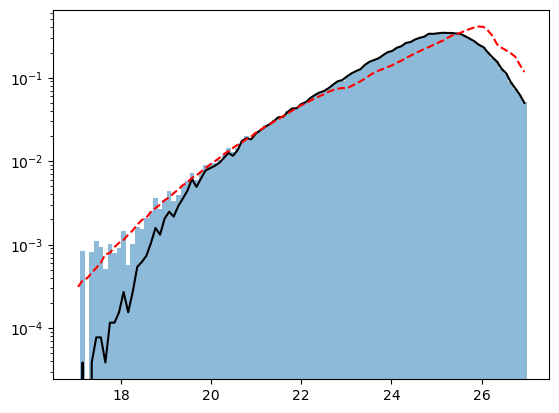

In [8]:
rng = np.random.RandomState(1234)


prob = 1.0 / ratio_mag(cosmos["mag_i_dered"])
prob /= np.sum(prob)
sample = rng.choice(cosmos["mag_i_dered"], size=1000000, p=prob, replace=True)

fig, axs = plt.subplots(1, 1)

mag = (bes[:-1] + bes[1:]) / 2
axs.hist(sample, bins=bes, density=True, alpha=0.5, label="sampled")
axs.plot(mag, hcosmos, '-k', label="cosmos")
axs.plot(mag, hcardinal, '--r', label="mdet")
axs.set_yscale("log")

## Make a Bunch

In [9]:
# get the seeds
req = requests.get('https://raw.githubusercontent.com/des-science/y6-image-sims/main/args-y6.txt')

req.raise_for_status()

seed_dict = {}
for line in req.text.split('\n'):
    line = line.strip()
    if not line:
        continue
    line = line.split()
    seed_dict[line[0]] = [int(x) for x in line[1:]]

assert len(seed_dict) == 1000
for v in seed_dict.values():
    assert len(v) == 10

In [10]:
partial_fnames = """\
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.277.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.278.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.281.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.282.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.304.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.307.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.316.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.319.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.341.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.342.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.345.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.346.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.357.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.358.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.361.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.362.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.421.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.422.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.425.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.426.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.432.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.435.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.444.fits
/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.447.fits""".splitlines()

partial_fnames = [os.path.basename(fn) for fn in partial_fnames]

all_fnames = set(
    os.path.basename(fn)
    for fn in glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
)
init_fnames = len(all_fnames)
all_fnames = all_fnames - set(partial_fnames)
assert len(all_fnames) == init_fnames - len(partial_fnames)
all_fnames = sorted(all_fnames)
all_fnames = [os.path.join("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/", fn) for fn in all_fnames]

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

nside = 8
n_per_tile = 1
for tname, seeds in tqdm.tqdm(seed_dict.items(), ncols=80, total=len(seed_dict)):
    tile = (
        "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
        f"{tname}_g_pizza_cutter_info.yaml"
    )
    with open(tile) as f:
        info = yaml.safe_load(f)
    wcs = galsim.FitsWCS(info["image_path"], hdu=1)

    for seed_ind in range(n_per_tile):
        _seed = seeds[seed_ind]
        _rng = np.random.RandomState(_seed)

        find = int(_rng.choice(len(all_fnames)))
        pix = int(all_fnames[find].split(".")[-2])
        cardinal = fitsio.read(all_fnames[find])

        tcat = make_input_cosmos_cat(
            cosmos=cosmos,
            sim=cardinal,
            nside=nside,
            pix=pix,
            seed=_seed,
            wcs=wcs,
            dz=0.2,
            di=0.5,
            dgmi=0.5,
            dustmap_fname="SFD_dust_4096.hsp",
        )

        msk = (
            (tcat["x_sim"] >= 250)
            & (tcat["x_sim"] <= 9750)
            & (tcat["y_sim"] >= 250)
            & (tcat["y_sim"] <= 9750)
            & (tcat["mag_i"] <= 25)
        )
        print("    # of objects:", np.sum(msk), flush=True)

        pth = os.path.join(
            os.path.expandvars("$PSCRATCH"),
            f"cosmos_simcat_v4_{tname}_seed{_seed}.fits",
        )

        fitsio.write(pth, tcat, clobber=True)
        os.system("chgrp des %s" % pth)
        os.system("chmod g+r %s" % pth)

  0%|                                                  | 0/1000 [00:00<?, ?it/s][      63s] making catalogs
[      63s] making catalogs done (0.308260 seconds)
[      63s] getting redshift bin matches w/ dz = 0.20
[      63s] getting redshift bin matches w/ dz = 0.20 done (0.272884 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[      63s] assigning anything else to something at faint magnitude at random
[      63s] assigning anything else to something at faint magnitude at random done (0.071019 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60901


  0%|                                        | 1/1000 [00:29<8:07:40, 29.29s/it][      91s] making catalogs
[      91s] making catalogs done (0.313768 seconds)
[      91s] getting redshift bin matches w/ dz = 0.20
[      91s] getting redshift bin matches w/ dz = 0.20 done (0.258297 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[      91s] assigning anything else to something at faint magnitude at random
[      91s] assigning anything else to something at faint magnitude at random done (0.055568 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67029


  0%|                                        | 2/1000 [00:53<7:20:31, 26.48s/it][     117s] making catalogs
[     118s] making catalogs done (0.304394 seconds)
[     118s] getting redshift bin matches w/ dz = 0.20
[     118s] getting redshift bin matches w/ dz = 0.20 done (0.265466 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     118s] assigning anything else to something at faint magnitude at random
[     118s] assigning anything else to something at faint magnitude at random done (0.050883 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60400


  0%|                                        | 3/1000 [01:20<7:23:12, 26.67s/it][     143s] making catalogs
[     144s] making catalogs done (0.287934 seconds)
[     144s] getting redshift bin matches w/ dz = 0.20
[     144s] getting redshift bin matches w/ dz = 0.20 done (0.253813 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     144s] assigning anything else to something at faint magnitude at random
[     144s] assigning anything else to something at faint magnitude at random done (0.069200 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59150


  0%|▏                                       | 4/1000 [01:46<7:17:46, 26.37s/it][     171s] making catalogs
[     171s] making catalogs done (0.287043 seconds)
[     171s] getting redshift bin matches w/ dz = 0.20
[     172s] getting redshift bin matches w/ dz = 0.20 done (0.254752 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     172s] assigning anything else to something at faint magnitude at random
[     172s] assigning anything else to something at faint magnitude at random done (0.056373 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56649


  0%|▏                                       | 5/1000 [02:14<7:24:53, 26.83s/it][     196s] making catalogs
[     197s] making catalogs done (0.310184 seconds)
[     197s] getting redshift bin matches w/ dz = 0.20
[     197s] getting redshift bin matches w/ dz = 0.20 done (0.270959 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     197s] assigning anything else to something at faint magnitude at random
[     197s] assigning anything else to something at faint magnitude at random done (0.052992 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58354


  1%|▏                                       | 6/1000 [02:39<7:16:09, 26.33s/it][     222s] making catalogs
[     223s] making catalogs done (0.294532 seconds)
[     223s] getting redshift bin matches w/ dz = 0.20
[     223s] getting redshift bin matches w/ dz = 0.20 done (0.267319 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     223s] assigning anything else to something at faint magnitude at random
[     223s] assigning anything else to something at faint magnitude at random done (0.053489 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62484


  1%|▎                                       | 7/1000 [03:05<7:14:07, 26.23s/it][     248s] making catalogs
[     248s] making catalogs done (0.297947 seconds)
[     248s] getting redshift bin matches w/ dz = 0.20
[     249s] getting redshift bin matches w/ dz = 0.20 done (0.265703 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     249s] assigning anything else to something at faint magnitude at random
[     249s] assigning anything else to something at faint magnitude at random done (0.052537 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58168


  1%|▎                                       | 8/1000 [03:31<7:10:16, 26.02s/it][     274s] making catalogs
[     275s] making catalogs done (0.320034 seconds)
[     275s] getting redshift bin matches w/ dz = 0.20
[     275s] getting redshift bin matches w/ dz = 0.20 done (0.284534 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     275s] assigning anything else to something at faint magnitude at random
[     275s] assigning anything else to something at faint magnitude at random done (0.072632 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60730


  1%|▎                                       | 9/1000 [03:57<7:11:19, 26.11s/it][     300s] making catalogs
[     300s] making catalogs done (0.288619 seconds)
[     300s] getting redshift bin matches w/ dz = 0.20
[     301s] getting redshift bin matches w/ dz = 0.20 done (0.247007 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     301s] assigning anything else to something at faint magnitude at random
[     301s] assigning anything else to something at faint magnitude at random done (0.068409 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58880


  1%|▍                                      | 10/1000 [04:23<7:09:07, 26.01s/it][     326s] making catalogs
[     326s] making catalogs done (0.295514 seconds)
[     326s] getting redshift bin matches w/ dz = 0.20
[     327s] getting redshift bin matches w/ dz = 0.20 done (0.254010 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     327s] assigning anything else to something at faint magnitude at random
[     327s] assigning anything else to something at faint magnitude at random done (0.058295 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60146


  1%|▍                                      | 11/1000 [04:49<7:07:56, 25.96s/it][     352s] making catalogs
[     352s] making catalogs done (0.341043 seconds)
[     352s] getting redshift bin matches w/ dz = 0.20
[     352s] getting redshift bin matches w/ dz = 0.20 done (0.257054 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     352s] assigning anything else to something at faint magnitude at random
[     352s] assigning anything else to something at faint magnitude at random done (0.063861 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60040


  1%|▍                                      | 12/1000 [05:14<7:05:59, 25.87s/it][     377s] making catalogs
[     377s] making catalogs done (0.276292 seconds)
[     377s] getting redshift bin matches w/ dz = 0.20
[     377s] getting redshift bin matches w/ dz = 0.20 done (0.241554 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     377s] assigning anything else to something at faint magnitude at random
[     377s] assigning anything else to something at faint magnitude at random done (0.068330 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61429


  1%|▌                                      | 13/1000 [05:40<7:02:57, 25.71s/it][     403s] making catalogs
[     403s] making catalogs done (0.325155 seconds)
[     403s] getting redshift bin matches w/ dz = 0.20
[     403s] getting redshift bin matches w/ dz = 0.20 done (0.288912 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     403s] assigning anything else to something at faint magnitude at random
[     403s] assigning anything else to something at faint magnitude at random done (0.072343 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60874


  1%|▌                                      | 14/1000 [06:06<7:03:09, 25.75s/it][     429s] making catalogs
[     429s] making catalogs done (0.373379 seconds)
[     429s] getting redshift bin matches w/ dz = 0.20
[     429s] getting redshift bin matches w/ dz = 0.20 done (0.293874 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     429s] assigning anything else to something at faint magnitude at random
[     430s] assigning anything else to something at faint magnitude at random done (0.053844 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60541


  2%|▌                                      | 15/1000 [06:32<7:05:37, 25.93s/it][     455s] making catalogs
[     455s] making catalogs done (0.308640 seconds)
[     455s] getting redshift bin matches w/ dz = 0.20
[     455s] getting redshift bin matches w/ dz = 0.20 done (0.280798 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     455s] assigning anything else to something at faint magnitude at random
[     456s] assigning anything else to something at faint magnitude at random done (0.071215 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59291


  2%|▌                                      | 16/1000 [06:58<7:05:12, 25.93s/it][     481s] making catalogs
[     481s] making catalogs done (0.309756 seconds)
[     481s] getting redshift bin matches w/ dz = 0.20
[     481s] getting redshift bin matches w/ dz = 0.20 done (0.271884 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     481s] assigning anything else to something at faint magnitude at random
[     482s] assigning anything else to something at faint magnitude at random done (0.049738 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 55233


  2%|▋                                      | 17/1000 [07:24<7:04:07, 25.89s/it][     507s] making catalogs
[     507s] making catalogs done (0.300012 seconds)
[     507s] getting redshift bin matches w/ dz = 0.20
[     507s] getting redshift bin matches w/ dz = 0.20 done (0.262486 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     507s] assigning anything else to something at faint magnitude at random
[     507s] assigning anything else to something at faint magnitude at random done (0.067812 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64178


  2%|▋                                      | 18/1000 [07:49<7:03:45, 25.89s/it][     532s] making catalogs
[     533s] making catalogs done (0.359507 seconds)
[     533s] getting redshift bin matches w/ dz = 0.20
[     533s] getting redshift bin matches w/ dz = 0.20 done (0.309200 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     533s] assigning anything else to something at faint magnitude at random
[     533s] assigning anything else to something at faint magnitude at random done (0.062495 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62966


  2%|▋                                      | 19/1000 [08:15<7:02:54, 25.87s/it][     558s] making catalogs
[     558s] making catalogs done (0.334893 seconds)
[     558s] getting redshift bin matches w/ dz = 0.20
[     558s] getting redshift bin matches w/ dz = 0.20 done (0.280335 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     558s] assigning anything else to something at faint magnitude at random
[     559s] assigning anything else to something at faint magnitude at random done (0.056102 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59893


  2%|▊                                      | 20/1000 [08:41<6:59:47, 25.70s/it][     584s] making catalogs
[     584s] making catalogs done (0.317328 seconds)
[     584s] getting redshift bin matches w/ dz = 0.20
[     584s] getting redshift bin matches w/ dz = 0.20 done (0.274755 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     584s] assigning anything else to something at faint magnitude at random
[     585s] assigning anything else to something at faint magnitude at random done (0.069466 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58857


  2%|▊                                      | 21/1000 [09:07<7:01:03, 25.81s/it][     610s] making catalogs
[     611s] making catalogs done (0.314335 seconds)
[     611s] getting redshift bin matches w/ dz = 0.20
[     611s] getting redshift bin matches w/ dz = 0.20 done (0.237838 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     611s] assigning anything else to something at faint magnitude at random
[     611s] assigning anything else to something at faint magnitude at random done (0.066688 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67272


  2%|▊                                      | 22/1000 [09:33<7:03:58, 26.01s/it][     636s] making catalogs
[     636s] making catalogs done (0.294715 seconds)
[     636s] getting redshift bin matches w/ dz = 0.20
[     637s] getting redshift bin matches w/ dz = 0.20 done (0.255022 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     637s] assigning anything else to something at faint magnitude at random
[     637s] assigning anything else to something at faint magnitude at random done (0.070371 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59668


  2%|▉                                      | 23/1000 [09:59<7:02:32, 25.95s/it][     662s] making catalogs
[     663s] making catalogs done (0.296534 seconds)
[     663s] getting redshift bin matches w/ dz = 0.20
[     663s] getting redshift bin matches w/ dz = 0.20 done (0.295947 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     663s] assigning anything else to something at faint magnitude at random
[     663s] assigning anything else to something at faint magnitude at random done (0.057024 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58964


  2%|▉                                      | 24/1000 [10:25<7:03:04, 26.01s/it][     688s] making catalogs
[     688s] making catalogs done (0.304929 seconds)
[     688s] getting redshift bin matches w/ dz = 0.20
[     688s] getting redshift bin matches w/ dz = 0.20 done (0.265984 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     688s] assigning anything else to something at faint magnitude at random
[     688s] assigning anything else to something at faint magnitude at random done (0.071418 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59540


  2%|▉                                      | 25/1000 [10:50<6:58:46, 25.77s/it][     712s] making catalogs
[     713s] making catalogs done (0.437836 seconds)
[     713s] getting redshift bin matches w/ dz = 0.20
[     713s] getting redshift bin matches w/ dz = 0.20 done (0.353541 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     713s] assigning anything else to something at faint magnitude at random
[     713s] assigning anything else to something at faint magnitude at random done (0.067508 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61536


  3%|█                                      | 26/1000 [11:16<6:56:14, 25.64s/it][     740s] making catalogs
[     741s] making catalogs done (0.332549 seconds)
[     741s] getting redshift bin matches w/ dz = 0.20
[     741s] getting redshift bin matches w/ dz = 0.20 done (0.287607 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     741s] assigning anything else to something at faint magnitude at random
[     741s] assigning anything else to something at faint magnitude at random done (0.072045 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59325


  3%|█                                      | 27/1000 [11:43<7:06:03, 26.27s/it][     767s] making catalogs
[     767s] making catalogs done (0.314224 seconds)
[     767s] getting redshift bin matches w/ dz = 0.20
[     767s] getting redshift bin matches w/ dz = 0.20 done (0.297739 seconds)


found matches for 99.82 percent of cosmos w/ z < 2.3


[     767s] getting redshift bin matches w/ dz = 0.30
[     767s] getting redshift bin matches w/ dz = 0.30 done (0.019142 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     767s] assigning anything else to something at faint magnitude at random
[     767s] assigning anything else to something at faint magnitude at random done (0.066191 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61350


  3%|█                                      | 28/1000 [12:12<7:14:39, 26.83s/it][     794s] making catalogs
[     794s] making catalogs done (0.335650 seconds)
[     794s] getting redshift bin matches w/ dz = 0.20
[     795s] getting redshift bin matches w/ dz = 0.20 done (0.323570 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     795s] assigning anything else to something at faint magnitude at random
[     795s] assigning anything else to something at faint magnitude at random done (0.054690 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62372


  3%|█▏                                     | 29/1000 [12:38<7:13:55, 26.81s/it][     821s] making catalogs
[     822s] making catalogs done (0.299027 seconds)
[     822s] getting redshift bin matches w/ dz = 0.20
[     822s] getting redshift bin matches w/ dz = 0.20 done (0.285286 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     822s] assigning anything else to something at faint magnitude at random
[     822s] assigning anything else to something at faint magnitude at random done (0.055003 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58497


  3%|█▏                                     | 30/1000 [13:04<7:09:39, 26.58s/it][     847s] making catalogs
[     847s] making catalogs done (0.310848 seconds)
[     847s] getting redshift bin matches w/ dz = 0.20
[     848s] getting redshift bin matches w/ dz = 0.20 done (0.278902 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     848s] assigning anything else to something at faint magnitude at random
[     848s] assigning anything else to something at faint magnitude at random done (0.053656 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60385


  3%|█▏                                     | 31/1000 [13:30<7:06:08, 26.39s/it][     873s] making catalogs
[     874s] making catalogs done (0.311769 seconds)
[     874s] getting redshift bin matches w/ dz = 0.20
[     874s] getting redshift bin matches w/ dz = 0.20 done (0.269579 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     874s] assigning anything else to something at faint magnitude at random
[     874s] assigning anything else to something at faint magnitude at random done (0.061162 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60445


  3%|█▏                                     | 32/1000 [13:56<7:02:08, 26.17s/it][     898s] making catalogs
[     899s] making catalogs done (0.323677 seconds)
[     899s] getting redshift bin matches w/ dz = 0.20
[     899s] getting redshift bin matches w/ dz = 0.20 done (0.288486 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     899s] assigning anything else to something at faint magnitude at random
[     899s] assigning anything else to something at faint magnitude at random done (0.058673 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60090


  3%|█▎                                     | 33/1000 [14:22<6:59:56, 26.06s/it][     925s] making catalogs
[     925s] making catalogs done (0.325204 seconds)
[     925s] getting redshift bin matches w/ dz = 0.20
[     926s] getting redshift bin matches w/ dz = 0.20 done (0.287729 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     926s] assigning anything else to something at faint magnitude at random
[     926s] assigning anything else to something at faint magnitude at random done (0.076630 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60748


  3%|█▎                                     | 34/1000 [14:48<6:59:42, 26.07s/it][     952s] making catalogs
[     952s] making catalogs done (0.338007 seconds)
[     952s] getting redshift bin matches w/ dz = 0.20
[     952s] getting redshift bin matches w/ dz = 0.20 done (0.296826 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     952s] assigning anything else to something at faint magnitude at random
[     952s] assigning anything else to something at faint magnitude at random done (0.063934 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62132


  4%|█▎                                     | 35/1000 [15:14<7:02:12, 26.25s/it][     978s] making catalogs
[     978s] making catalogs done (0.293351 seconds)
[     978s] getting redshift bin matches w/ dz = 0.20
[     978s] getting redshift bin matches w/ dz = 0.20 done (0.257626 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[     978s] assigning anything else to something at faint magnitude at random
[     978s] assigning anything else to something at faint magnitude at random done (0.057589 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60085


  4%|█▍                                     | 36/1000 [15:41<7:01:59, 26.26s/it][    1004s] making catalogs
[    1005s] making catalogs done (0.270889 seconds)
[    1005s] getting redshift bin matches w/ dz = 0.20
[    1005s] getting redshift bin matches w/ dz = 0.20 done (0.234493 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1005s] assigning anything else to something at faint magnitude at random
[    1005s] assigning anything else to something at faint magnitude at random done (0.062074 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62044


  4%|█▍                                     | 37/1000 [16:07<7:02:10, 26.30s/it][    1030s] making catalogs
[    1030s] making catalogs done (0.319410 seconds)
[    1030s] getting redshift bin matches w/ dz = 0.20
[    1031s] getting redshift bin matches w/ dz = 0.20 done (0.289807 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1031s] assigning anything else to something at faint magnitude at random
[    1031s] assigning anything else to something at faint magnitude at random done (0.062781 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61629


  4%|█▍                                     | 38/1000 [16:34<7:05:02, 26.51s/it][    1057s] making catalogs
[    1057s] making catalogs done (0.317902 seconds)
[    1057s] getting redshift bin matches w/ dz = 0.20
[    1057s] getting redshift bin matches w/ dz = 0.20 done (0.269610 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1057s] assigning anything else to something at faint magnitude at random
[    1058s] assigning anything else to something at faint magnitude at random done (0.069106 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61514


  4%|█▌                                     | 39/1000 [17:00<7:00:16, 26.24s/it][    1082s] making catalogs
[    1083s] making catalogs done (0.318453 seconds)
[    1083s] getting redshift bin matches w/ dz = 0.20
[    1083s] getting redshift bin matches w/ dz = 0.20 done (0.246758 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1083s] assigning anything else to something at faint magnitude at random
[    1083s] assigning anything else to something at faint magnitude at random done (0.071261 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61213


  4%|█▌                                     | 40/1000 [17:25<6:55:55, 26.00s/it][    1109s] making catalogs
[    1109s] making catalogs done (0.289845 seconds)
[    1109s] getting redshift bin matches w/ dz = 0.20
[    1109s] getting redshift bin matches w/ dz = 0.20 done (0.270105 seconds)


found matches for 99.99 percent of cosmos w/ z < 2.3


[    1109s] getting redshift bin matches w/ dz = 0.30
[    1109s] getting redshift bin matches w/ dz = 0.30 done (0.017513 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1109s] assigning anything else to something at faint magnitude at random
[    1109s] assigning anything else to something at faint magnitude at random done (0.063100 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60265


  4%|█▌                                     | 41/1000 [17:52<7:01:42, 26.38s/it][    1136s] making catalogs
[    1136s] making catalogs done (0.304364 seconds)
[    1136s] getting redshift bin matches w/ dz = 0.20
[    1136s] getting redshift bin matches w/ dz = 0.20 done (0.292537 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1136s] assigning anything else to something at faint magnitude at random
[    1137s] assigning anything else to something at faint magnitude at random done (0.052290 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60457


  4%|█▋                                     | 42/1000 [18:19<6:59:49, 26.29s/it][    1163s] making catalogs
[    1163s] making catalogs done (0.295721 seconds)
[    1163s] getting redshift bin matches w/ dz = 0.20
[    1163s] getting redshift bin matches w/ dz = 0.20 done (0.261633 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1163s] assigning anything else to something at faint magnitude at random
[    1163s] assigning anything else to something at faint magnitude at random done (0.067441 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59269


  4%|█▋                                     | 43/1000 [18:45<7:02:03, 26.46s/it][    1189s] making catalogs
[    1190s] making catalogs done (0.316766 seconds)
[    1190s] getting redshift bin matches w/ dz = 0.20
[    1190s] getting redshift bin matches w/ dz = 0.20 done (0.282853 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1190s] assigning anything else to something at faint magnitude at random
[    1190s] assigning anything else to something at faint magnitude at random done (0.067546 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59771


  4%|█▋                                     | 44/1000 [19:12<7:01:47, 26.47s/it][    1218s] making catalogs
[    1218s] making catalogs done (0.311481 seconds)
[    1218s] getting redshift bin matches w/ dz = 0.20
[    1218s] getting redshift bin matches w/ dz = 0.20 done (0.282036 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1218s] assigning anything else to something at faint magnitude at random
[    1219s] assigning anything else to something at faint magnitude at random done (0.053365 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61155


  4%|█▊                                     | 45/1000 [19:41<7:12:06, 27.15s/it][    1246s] making catalogs
[    1246s] making catalogs done (0.318385 seconds)
[    1246s] getting redshift bin matches w/ dz = 0.20
[    1246s] getting redshift bin matches w/ dz = 0.20 done (0.271334 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1246s] assigning anything else to something at faint magnitude at random
[    1246s] assigning anything else to something at faint magnitude at random done (0.059810 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58725


  5%|█▊                                     | 46/1000 [20:09<7:15:03, 27.36s/it][    1272s] making catalogs
[    1272s] making catalogs done (0.265207 seconds)
[    1272s] getting redshift bin matches w/ dz = 0.20
[    1273s] getting redshift bin matches w/ dz = 0.20 done (0.268317 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1273s] assigning anything else to something at faint magnitude at random
[    1273s] assigning anything else to something at faint magnitude at random done (0.052600 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67243


  5%|█▊                                     | 47/1000 [20:35<7:09:32, 27.04s/it][    1298s] making catalogs
[    1298s] making catalogs done (0.312040 seconds)
[    1298s] getting redshift bin matches w/ dz = 0.20
[    1299s] getting redshift bin matches w/ dz = 0.20 done (0.291794 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1299s] assigning anything else to something at faint magnitude at random
[    1299s] assigning anything else to something at faint magnitude at random done (0.070092 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59915


  5%|█▊                                     | 48/1000 [21:01<7:03:56, 26.72s/it][    1324s] making catalogs
[    1324s] making catalogs done (0.312722 seconds)
[    1324s] getting redshift bin matches w/ dz = 0.20
[    1324s] getting redshift bin matches w/ dz = 0.20 done (0.237788 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1324s] assigning anything else to something at faint magnitude at random
[    1324s] assigning anything else to something at faint magnitude at random done (0.070796 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59061


  5%|█▉                                     | 49/1000 [21:26<6:58:14, 26.39s/it][    1350s] making catalogs
[    1351s] making catalogs done (0.328791 seconds)
[    1351s] getting redshift bin matches w/ dz = 0.20
[    1351s] getting redshift bin matches w/ dz = 0.20 done (0.293200 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1351s] assigning anything else to something at faint magnitude at random
[    1351s] assigning anything else to something at faint magnitude at random done (0.056654 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61761


  5%|█▉                                     | 50/1000 [21:53<6:59:13, 26.48s/it][    1376s] making catalogs
[    1376s] making catalogs done (0.299875 seconds)
[    1376s] getting redshift bin matches w/ dz = 0.20
[    1376s] getting redshift bin matches w/ dz = 0.20 done (0.270639 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1376s] assigning anything else to something at faint magnitude at random
[    1376s] assigning anything else to something at faint magnitude at random done (0.069273 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58354


  5%|█▉                                     | 51/1000 [22:19<6:53:51, 26.17s/it][    1402s] making catalogs
[    1402s] making catalogs done (0.291711 seconds)
[    1402s] getting redshift bin matches w/ dz = 0.20
[    1402s] getting redshift bin matches w/ dz = 0.20 done (0.250888 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1402s] assigning anything else to something at faint magnitude at random
[    1402s] assigning anything else to something at faint magnitude at random done (0.065065 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61214


  5%|██                                     | 52/1000 [22:44<6:52:30, 26.11s/it][    1427s] making catalogs
[    1428s] making catalogs done (0.317061 seconds)
[    1428s] getting redshift bin matches w/ dz = 0.20
[    1428s] getting redshift bin matches w/ dz = 0.20 done (0.276723 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1428s] assigning anything else to something at faint magnitude at random
[    1428s] assigning anything else to something at faint magnitude at random done (0.062511 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60794


  5%|██                                     | 53/1000 [23:10<6:49:10, 25.92s/it][    1452s] making catalogs
[    1452s] making catalogs done (0.367928 seconds)
[    1452s] getting redshift bin matches w/ dz = 0.20
[    1453s] getting redshift bin matches w/ dz = 0.20 done (0.287433 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1453s] assigning anything else to something at faint magnitude at random
[    1453s] assigning anything else to something at faint magnitude at random done (0.060701 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59769


  5%|██                                     | 54/1000 [23:35<6:43:22, 25.58s/it][    1480s] making catalogs
[    1480s] making catalogs done (0.395840 seconds)
[    1480s] getting redshift bin matches w/ dz = 0.20
[    1481s] getting redshift bin matches w/ dz = 0.20 done (0.343511 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1481s] assigning anything else to something at faint magnitude at random
[    1481s] assigning anything else to something at faint magnitude at random done (0.062358 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59173


  6%|██▏                                    | 55/1000 [24:03<6:54:34, 26.32s/it][    1506s] making catalogs
[    1506s] making catalogs done (0.287716 seconds)
[    1506s] getting redshift bin matches w/ dz = 0.20
[    1506s] getting redshift bin matches w/ dz = 0.20 done (0.238899 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1506s] assigning anything else to something at faint magnitude at random
[    1506s] assigning anything else to something at faint magnitude at random done (0.060097 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 66113


  6%|██▏                                    | 56/1000 [24:29<6:51:43, 26.17s/it][    1533s] making catalogs
[    1534s] making catalogs done (0.323480 seconds)
[    1534s] getting redshift bin matches w/ dz = 0.20
[    1534s] getting redshift bin matches w/ dz = 0.20 done (0.286955 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1534s] assigning anything else to something at faint magnitude at random
[    1534s] assigning anything else to something at faint magnitude at random done (0.070919 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59704


  6%|██▏                                    | 57/1000 [24:56<6:57:43, 26.58s/it][    1565s] making catalogs
[    1565s] making catalogs done (0.302571 seconds)
[    1565s] getting redshift bin matches w/ dz = 0.20
[    1566s] getting redshift bin matches w/ dz = 0.20 done (0.278769 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1566s] assigning anything else to something at faint magnitude at random
[    1566s] assigning anything else to something at faint magnitude at random done (0.071938 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63714


  6%|██▎                                    | 58/1000 [25:28<7:20:45, 28.07s/it][    1593s] making catalogs
[    1593s] making catalogs done (0.309135 seconds)
[    1593s] getting redshift bin matches w/ dz = 0.20
[    1594s] getting redshift bin matches w/ dz = 0.20 done (0.291418 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1594s] assigning anything else to something at faint magnitude at random
[    1594s] assigning anything else to something at faint magnitude at random done (0.075711 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59005


  6%|██▎                                    | 59/1000 [25:56<7:21:05, 28.13s/it][    1620s] making catalogs
[    1620s] making catalogs done (0.326354 seconds)
[    1620s] getting redshift bin matches w/ dz = 0.20
[    1621s] getting redshift bin matches w/ dz = 0.20 done (0.277222 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1621s] assigning anything else to something at faint magnitude at random
[    1621s] assigning anything else to something at faint magnitude at random done (0.055228 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60031


  6%|██▎                                    | 60/1000 [26:23<7:14:55, 27.76s/it][    1646s] making catalogs
[    1646s] making catalogs done (0.325354 seconds)
[    1646s] getting redshift bin matches w/ dz = 0.20
[    1647s] getting redshift bin matches w/ dz = 0.20 done (0.293887 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1647s] assigning anything else to something at faint magnitude at random
[    1647s] assigning anything else to something at faint magnitude at random done (0.052705 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58514


  6%|██▍                                    | 61/1000 [26:49<7:05:49, 27.21s/it][    1671s] making catalogs
[    1671s] making catalogs done (0.312149 seconds)
[    1671s] getting redshift bin matches w/ dz = 0.20
[    1672s] getting redshift bin matches w/ dz = 0.20 done (0.347098 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1672s] assigning anything else to something at faint magnitude at random
[    1672s] assigning anything else to something at faint magnitude at random done (0.069760 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61434


  6%|██▍                                    | 62/1000 [27:14<6:56:30, 26.64s/it][    1697s] making catalogs
[    1697s] making catalogs done (0.334298 seconds)
[    1697s] getting redshift bin matches w/ dz = 0.20
[    1697s] getting redshift bin matches w/ dz = 0.20 done (0.264562 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1697s] assigning anything else to something at faint magnitude at random
[    1697s] assigning anything else to something at faint magnitude at random done (0.063176 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61460


  6%|██▍                                    | 63/1000 [27:39<6:49:52, 26.25s/it][    1722s] making catalogs
[    1722s] making catalogs done (0.290831 seconds)
[    1722s] getting redshift bin matches w/ dz = 0.20
[    1722s] getting redshift bin matches w/ dz = 0.20 done (0.261245 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1722s] assigning anything else to something at faint magnitude at random
[    1722s] assigning anything else to something at faint magnitude at random done (0.060346 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60279


  6%|██▍                                    | 64/1000 [28:04<6:42:52, 25.83s/it][    1749s] making catalogs
[    1749s] making catalogs done (0.305058 seconds)
[    1749s] getting redshift bin matches w/ dz = 0.20
[    1750s] getting redshift bin matches w/ dz = 0.20 done (0.272655 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1750s] assigning anything else to something at faint magnitude at random
[    1750s] assigning anything else to something at faint magnitude at random done (0.053596 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61563


  6%|██▌                                    | 65/1000 [28:32<6:50:48, 26.36s/it][    1776s] making catalogs
[    1776s] making catalogs done (0.320575 seconds)
[    1776s] getting redshift bin matches w/ dz = 0.20
[    1776s] getting redshift bin matches w/ dz = 0.20 done (0.261091 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1776s] assigning anything else to something at faint magnitude at random
[    1776s] assigning anything else to something at faint magnitude at random done (0.072383 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58262


  7%|██▌                                    | 66/1000 [28:58<6:51:04, 26.41s/it][    1801s] making catalogs
[    1801s] making catalogs done (0.309439 seconds)
[    1801s] getting redshift bin matches w/ dz = 0.20
[    1801s] getting redshift bin matches w/ dz = 0.20 done (0.252576 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1801s] assigning anything else to something at faint magnitude at random
[    1801s] assigning anything else to something at faint magnitude at random done (0.059305 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60180


  7%|██▌                                    | 67/1000 [29:23<6:43:08, 25.93s/it][    1827s] making catalogs
[    1827s] making catalogs done (0.405509 seconds)
[    1827s] getting redshift bin matches w/ dz = 0.20
[    1827s] getting redshift bin matches w/ dz = 0.20 done (0.289295 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1827s] assigning anything else to something at faint magnitude at random
[    1827s] assigning anything else to something at faint magnitude at random done (0.061912 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58988


  7%|██▋                                    | 68/1000 [29:49<6:44:16, 26.03s/it][    1861s] making catalogs
[    1861s] making catalogs done (0.304057 seconds)
[    1861s] getting redshift bin matches w/ dz = 0.20
[    1861s] getting redshift bin matches w/ dz = 0.20 done (0.282268 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1861s] assigning anything else to something at faint magnitude at random
[    1861s] assigning anything else to something at faint magnitude at random done (0.060199 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61096


  7%|██▋                                    | 69/1000 [30:23<7:20:54, 28.42s/it][    1886s] making catalogs
[    1887s] making catalogs done (0.293124 seconds)
[    1887s] getting redshift bin matches w/ dz = 0.20
[    1887s] getting redshift bin matches w/ dz = 0.20 done (0.260838 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1887s] assigning anything else to something at faint magnitude at random
[    1887s] assigning anything else to something at faint magnitude at random done (0.051111 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61996


  7%|██▋                                    | 70/1000 [30:49<7:07:37, 27.59s/it][    1913s] making catalogs
[    1913s] making catalogs done (0.293219 seconds)
[    1913s] getting redshift bin matches w/ dz = 0.20
[    1913s] getting redshift bin matches w/ dz = 0.20 done (0.263935 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1913s] assigning anything else to something at faint magnitude at random
[    1913s] assigning anything else to something at faint magnitude at random done (0.066154 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60312


  7%|██▊                                    | 71/1000 [31:15<7:01:07, 27.20s/it][    1938s] making catalogs
[    1939s] making catalogs done (0.289248 seconds)
[    1939s] getting redshift bin matches w/ dz = 0.20
[    1939s] getting redshift bin matches w/ dz = 0.20 done (0.232426 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1939s] assigning anything else to something at faint magnitude at random
[    1939s] assigning anything else to something at faint magnitude at random done (0.066951 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60819


  7%|██▊                                    | 72/1000 [31:41<6:54:03, 26.77s/it][    1965s] making catalogs
[    1965s] making catalogs done (0.354158 seconds)
[    1965s] getting redshift bin matches w/ dz = 0.20
[    1965s] getting redshift bin matches w/ dz = 0.20 done (0.301035 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1965s] assigning anything else to something at faint magnitude at random
[    1965s] assigning anything else to something at faint magnitude at random done (0.053331 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60566


  7%|██▊                                    | 73/1000 [32:07<6:51:18, 26.62s/it][    1990s] making catalogs
[    1990s] making catalogs done (0.307243 seconds)
[    1990s] getting redshift bin matches w/ dz = 0.20
[    1991s] getting redshift bin matches w/ dz = 0.20 done (0.271257 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    1991s] assigning anything else to something at faint magnitude at random
[    1991s] assigning anything else to something at faint magnitude at random done (0.067087 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61513


  7%|██▉                                    | 74/1000 [32:33<6:45:08, 26.25s/it][    2015s] making catalogs
[    2016s] making catalogs done (0.289948 seconds)
[    2016s] getting redshift bin matches w/ dz = 0.20
[    2016s] getting redshift bin matches w/ dz = 0.20 done (0.268373 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2016s] assigning anything else to something at faint magnitude at random
[    2016s] assigning anything else to something at faint magnitude at random done (0.053325 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57366


  8%|██▉                                    | 75/1000 [32:58<6:39:23, 25.91s/it][    2041s] making catalogs
[    2041s] making catalogs done (0.268847 seconds)
[    2041s] getting redshift bin matches w/ dz = 0.20
[    2042s] getting redshift bin matches w/ dz = 0.20 done (0.247978 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2042s] assigning anything else to something at faint magnitude at random
[    2042s] assigning anything else to something at faint magnitude at random done (0.058770 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64181


  8%|██▉                                    | 76/1000 [33:24<6:37:56, 25.84s/it][    2067s] making catalogs
[    2068s] making catalogs done (0.295603 seconds)
[    2068s] getting redshift bin matches w/ dz = 0.20
[    2068s] getting redshift bin matches w/ dz = 0.20 done (0.266788 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2068s] assigning anything else to something at faint magnitude at random
[    2068s] assigning anything else to something at faint magnitude at random done (0.053693 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60100


  8%|███                                    | 77/1000 [33:50<6:39:07, 25.95s/it][    2095s] making catalogs
[    2095s] making catalogs done (0.297510 seconds)
[    2095s] getting redshift bin matches w/ dz = 0.20
[    2095s] getting redshift bin matches w/ dz = 0.20 done (0.265576 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2095s] assigning anything else to something at faint magnitude at random
[    2095s] assigning anything else to something at faint magnitude at random done (0.050877 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59631


  8%|███                                    | 78/1000 [34:17<6:45:44, 26.40s/it][    2120s] making catalogs
[    2121s] making catalogs done (0.321505 seconds)
[    2121s] getting redshift bin matches w/ dz = 0.20
[    2121s] getting redshift bin matches w/ dz = 0.20 done (0.284008 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2121s] assigning anything else to something at faint magnitude at random
[    2121s] assigning anything else to something at faint magnitude at random done (0.067457 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60555


  8%|███                                    | 79/1000 [34:43<6:41:32, 26.16s/it][    2148s] making catalogs
[    2148s] making catalogs done (0.298241 seconds)
[    2148s] getting redshift bin matches w/ dz = 0.20
[    2149s] getting redshift bin matches w/ dz = 0.20 done (0.253464 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2149s] assigning anything else to something at faint magnitude at random
[    2149s] assigning anything else to something at faint magnitude at random done (0.063770 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60687


  8%|███                                    | 80/1000 [35:11<6:48:44, 26.66s/it][    2173s] making catalogs
[    2173s] making catalogs done (0.310599 seconds)
[    2173s] getting redshift bin matches w/ dz = 0.20
[    2174s] getting redshift bin matches w/ dz = 0.20 done (0.281516 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2174s] assigning anything else to something at faint magnitude at random
[    2174s] assigning anything else to something at faint magnitude at random done (0.060504 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61433


  8%|███▏                                   | 81/1000 [35:36<6:41:14, 26.20s/it][    2201s] making catalogs
[    2201s] making catalogs done (0.320200 seconds)
[    2201s] getting redshift bin matches w/ dz = 0.20
[    2201s] getting redshift bin matches w/ dz = 0.20 done (0.271396 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2201s] assigning anything else to something at faint magnitude at random
[    2201s] assigning anything else to something at faint magnitude at random done (0.065222 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58987


  8%|███▏                                   | 82/1000 [36:03<6:46:17, 26.56s/it][    2226s] making catalogs
[    2226s] making catalogs done (0.374832 seconds)
[    2226s] getting redshift bin matches w/ dz = 0.20
[    2226s] getting redshift bin matches w/ dz = 0.20 done (0.299531 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2226s] assigning anything else to something at faint magnitude at random
[    2226s] assigning anything else to something at faint magnitude at random done (0.074291 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58394


  8%|███▏                                   | 83/1000 [36:29<6:40:38, 26.21s/it][    2252s] making catalogs
[    2253s] making catalogs done (0.288070 seconds)
[    2253s] getting redshift bin matches w/ dz = 0.20
[    2253s] getting redshift bin matches w/ dz = 0.20 done (0.251360 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2253s] assigning anything else to something at faint magnitude at random
[    2253s] assigning anything else to something at faint magnitude at random done (0.070325 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60922


  8%|███▎                                   | 84/1000 [36:55<6:41:11, 26.28s/it][    2280s] making catalogs
[    2280s] making catalogs done (0.336745 seconds)
[    2280s] getting redshift bin matches w/ dz = 0.20
[    2281s] getting redshift bin matches w/ dz = 0.20 done (0.396207 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2281s] assigning anything else to something at faint magnitude at random
[    2281s] assigning anything else to something at faint magnitude at random done (0.057907 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61124


  8%|███▎                                   | 85/1000 [37:23<6:47:48, 26.74s/it][    2307s] making catalogs
[    2307s] making catalogs done (0.335535 seconds)
[    2307s] getting redshift bin matches w/ dz = 0.20
[    2308s] getting redshift bin matches w/ dz = 0.20 done (0.293662 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2308s] assigning anything else to something at faint magnitude at random
[    2308s] assigning anything else to something at faint magnitude at random done (0.053879 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61683


  9%|███▎                                   | 86/1000 [37:50<6:48:08, 26.79s/it][    2333s] making catalogs
[    2333s] making catalogs done (0.289790 seconds)
[    2333s] getting redshift bin matches w/ dz = 0.20
[    2333s] getting redshift bin matches w/ dz = 0.20 done (0.262290 seconds)


found matches for 99.31 percent of cosmos w/ z < 2.3


[    2333s] getting redshift bin matches w/ dz = 0.30
[    2333s] getting redshift bin matches w/ dz = 0.30 done (0.018159 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2333s] assigning anything else to something at faint magnitude at random
[    2333s] assigning anything else to something at faint magnitude at random done (0.066454 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60572


  9%|███▍                                   | 87/1000 [38:15<6:41:44, 26.40s/it][    2360s] making catalogs
[    2360s] making catalogs done (0.313373 seconds)
[    2360s] getting redshift bin matches w/ dz = 0.20
[    2361s] getting redshift bin matches w/ dz = 0.20 done (0.257826 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2361s] assigning anything else to something at faint magnitude at random
[    2361s] assigning anything else to something at faint magnitude at random done (0.071402 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61121


  9%|███▍                                   | 88/1000 [38:43<6:46:15, 26.73s/it][    2387s] making catalogs
[    2388s] making catalogs done (0.280998 seconds)
[    2388s] getting redshift bin matches w/ dz = 0.20
[    2388s] getting redshift bin matches w/ dz = 0.20 done (0.254401 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2388s] assigning anything else to something at faint magnitude at random
[    2388s] assigning anything else to something at faint magnitude at random done (0.058227 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60299


  9%|███▍                                   | 89/1000 [39:12<6:56:10, 27.41s/it][    2416s] making catalogs
[    2416s] making catalogs done (0.294017 seconds)
[    2416s] getting redshift bin matches w/ dz = 0.20
[    2417s] getting redshift bin matches w/ dz = 0.20 done (0.240896 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2417s] assigning anything else to something at faint magnitude at random
[    2417s] assigning anything else to something at faint magnitude at random done (0.069481 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62427


  9%|███▌                                   | 90/1000 [39:40<7:00:45, 27.74s/it][    2445s] making catalogs
[    2445s] making catalogs done (0.299803 seconds)
[    2445s] getting redshift bin matches w/ dz = 0.20
[    2446s] getting redshift bin matches w/ dz = 0.20 done (0.270230 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2446s] assigning anything else to something at faint magnitude at random
[    2446s] assigning anything else to something at faint magnitude at random done (0.054546 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60318


  9%|███▌                                   | 91/1000 [40:09<7:02:40, 27.90s/it][    2474s] making catalogs
[    2474s] making catalogs done (0.333292 seconds)
[    2474s] getting redshift bin matches w/ dz = 0.20
[    2474s] getting redshift bin matches w/ dz = 0.20 done (0.283696 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2474s] assigning anything else to something at faint magnitude at random
[    2474s] assigning anything else to something at faint magnitude at random done (0.062115 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58958


  9%|███▌                                   | 92/1000 [40:36<7:00:53, 27.81s/it][    2491s] making catalogs
[    2491s] making catalogs done (0.273086 seconds)
[    2491s] getting redshift bin matches w/ dz = 0.20
[    2492s] getting redshift bin matches w/ dz = 0.20 done (0.228226 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2492s] assigning anything else to something at faint magnitude at random
[    2492s] assigning anything else to something at faint magnitude at random done (0.058423 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59249


  9%|███▋                                   | 93/1000 [40:53<6:12:46, 24.66s/it][    2517s] making catalogs
[    2517s] making catalogs done (0.326922 seconds)
[    2517s] getting redshift bin matches w/ dz = 0.20
[    2518s] getting redshift bin matches w/ dz = 0.20 done (0.287197 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2518s] assigning anything else to something at faint magnitude at random
[    2518s] assigning anything else to something at faint magnitude at random done (0.074419 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57335


  9%|███▋                                   | 94/1000 [41:20<6:20:31, 25.20s/it][    2543s] making catalogs
[    2543s] making catalogs done (0.292027 seconds)
[    2543s] getting redshift bin matches w/ dz = 0.20
[    2543s] getting redshift bin matches w/ dz = 0.20 done (0.269376 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2543s] assigning anything else to something at faint magnitude at random
[    2543s] assigning anything else to something at faint magnitude at random done (0.061825 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61698


 10%|███▋                                   | 95/1000 [41:45<6:20:16, 25.21s/it][    2570s] making catalogs
[    2570s] making catalogs done (0.356106 seconds)
[    2570s] getting redshift bin matches w/ dz = 0.20
[    2570s] getting redshift bin matches w/ dz = 0.20 done (0.295180 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2570s] assigning anything else to something at faint magnitude at random
[    2570s] assigning anything else to something at faint magnitude at random done (0.053509 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62167


 10%|███▋                                   | 96/1000 [42:12<6:29:19, 25.84s/it][    2596s] making catalogs
[    2596s] making catalogs done (0.300056 seconds)
[    2596s] getting redshift bin matches w/ dz = 0.20
[    2596s] getting redshift bin matches w/ dz = 0.20 done (0.263960 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2596s] assigning anything else to something at faint magnitude at random
[    2596s] assigning anything else to something at faint magnitude at random done (0.069550 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59622


 10%|███▊                                   | 97/1000 [42:38<6:29:19, 25.87s/it][    2621s] making catalogs
[    2621s] making catalogs done (0.294069 seconds)
[    2621s] getting redshift bin matches w/ dz = 0.20
[    2621s] getting redshift bin matches w/ dz = 0.20 done (0.260037 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2621s] assigning anything else to something at faint magnitude at random
[    2621s] assigning anything else to something at faint magnitude at random done (0.061736 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60608


 10%|███▊                                   | 98/1000 [43:03<6:24:23, 25.57s/it][    2646s] making catalogs
[    2647s] making catalogs done (0.285892 seconds)
[    2647s] getting redshift bin matches w/ dz = 0.20
[    2647s] getting redshift bin matches w/ dz = 0.20 done (0.242498 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2647s] assigning anything else to something at faint magnitude at random
[    2647s] assigning anything else to something at faint magnitude at random done (0.063372 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58758


 10%|███▊                                   | 99/1000 [43:29<6:24:37, 25.61s/it][    2672s] making catalogs
[    2672s] making catalogs done (0.367016 seconds)
[    2672s] getting redshift bin matches w/ dz = 0.20
[    2673s] getting redshift bin matches w/ dz = 0.20 done (0.268770 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2673s] assigning anything else to something at faint magnitude at random
[    2673s] assigning anything else to something at faint magnitude at random done (0.054392 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60597


 10%|███▊                                  | 100/1000 [43:55<6:24:43, 25.65s/it][    2697s] making catalogs
[    2697s] making catalogs done (0.320673 seconds)
[    2697s] getting redshift bin matches w/ dz = 0.20
[    2698s] getting redshift bin matches w/ dz = 0.20 done (0.261799 seconds)


found matches for 99.33 percent of cosmos w/ z < 2.3


[    2698s] getting redshift bin matches w/ dz = 0.30
[    2698s] getting redshift bin matches w/ dz = 0.30 done (0.035810 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2698s] assigning anything else to something at faint magnitude at random
[    2698s] assigning anything else to something at faint magnitude at random done (0.053167 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59650


 10%|███▊                                  | 101/1000 [44:20<6:21:56, 25.49s/it][    2722s] making catalogs
[    2723s] making catalogs done (0.301252 seconds)
[    2723s] getting redshift bin matches w/ dz = 0.20
[    2723s] getting redshift bin matches w/ dz = 0.20 done (0.278680 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2723s] assigning anything else to something at faint magnitude at random
[    2723s] assigning anything else to something at faint magnitude at random done (0.062779 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62060


 10%|███▉                                  | 102/1000 [44:45<6:20:46, 25.44s/it][    2748s] making catalogs
[    2748s] making catalogs done (0.279305 seconds)
[    2748s] getting redshift bin matches w/ dz = 0.20
[    2748s] getting redshift bin matches w/ dz = 0.20 done (0.254902 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2748s] assigning anything else to something at faint magnitude at random
[    2748s] assigning anything else to something at faint magnitude at random done (0.071895 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60475


 10%|███▉                                  | 103/1000 [45:10<6:19:39, 25.40s/it][    2773s] making catalogs
[    2774s] making catalogs done (0.283243 seconds)
[    2774s] getting redshift bin matches w/ dz = 0.20
[    2774s] getting redshift bin matches w/ dz = 0.20 done (0.244928 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2774s] assigning anything else to something at faint magnitude at random
[    2774s] assigning anything else to something at faint magnitude at random done (0.069797 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59584


 10%|███▉                                  | 104/1000 [45:36<6:20:10, 25.46s/it][    2799s] making catalogs
[    2799s] making catalogs done (0.292800 seconds)
[    2799s] getting redshift bin matches w/ dz = 0.20
[    2799s] getting redshift bin matches w/ dz = 0.20 done (0.264098 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2799s] assigning anything else to something at faint magnitude at random
[    2799s] assigning anything else to something at faint magnitude at random done (0.058303 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59318


 10%|███▉                                  | 105/1000 [46:01<6:17:57, 25.34s/it][    2824s] making catalogs
[    2824s] making catalogs done (0.293184 seconds)
[    2824s] getting redshift bin matches w/ dz = 0.20
[    2824s] getting redshift bin matches w/ dz = 0.20 done (0.289074 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2824s] assigning anything else to something at faint magnitude at random
[    2824s] assigning anything else to something at faint magnitude at random done (0.054954 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59661


 11%|████                                  | 106/1000 [46:27<6:17:53, 25.36s/it][    2852s] making catalogs
[    2852s] making catalogs done (0.302738 seconds)
[    2852s] getting redshift bin matches w/ dz = 0.20
[    2852s] getting redshift bin matches w/ dz = 0.20 done (0.259583 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2852s] assigning anything else to something at faint magnitude at random
[    2852s] assigning anything else to something at faint magnitude at random done (0.059851 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60125


 11%|████                                  | 107/1000 [46:55<6:29:28, 26.17s/it][    2877s] making catalogs
[    2878s] making catalogs done (0.338679 seconds)
[    2878s] getting redshift bin matches w/ dz = 0.20
[    2878s] getting redshift bin matches w/ dz = 0.20 done (0.268267 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2878s] assigning anything else to something at faint magnitude at random
[    2878s] assigning anything else to something at faint magnitude at random done (0.069396 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58979


 11%|████                                  | 108/1000 [47:20<6:26:27, 25.99s/it][    2903s] making catalogs
[    2903s] making catalogs done (0.278059 seconds)
[    2903s] getting redshift bin matches w/ dz = 0.20
[    2903s] getting redshift bin matches w/ dz = 0.20 done (0.256873 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2903s] assigning anything else to something at faint magnitude at random
[    2903s] assigning anything else to something at faint magnitude at random done (0.049070 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60923


 11%|████▏                                 | 109/1000 [47:45<6:21:36, 25.70s/it][    2930s] making catalogs
[    2930s] making catalogs done (0.281340 seconds)
[    2930s] getting redshift bin matches w/ dz = 0.20
[    2930s] getting redshift bin matches w/ dz = 0.20 done (0.273248 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2930s] assigning anything else to something at faint magnitude at random
[    2930s] assigning anything else to something at faint magnitude at random done (0.051008 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60451


 11%|████▏                                 | 110/1000 [48:12<6:27:18, 26.11s/it][    2955s] making catalogs
[    2956s] making catalogs done (0.297823 seconds)
[    2956s] getting redshift bin matches w/ dz = 0.20
[    2956s] getting redshift bin matches w/ dz = 0.20 done (0.272486 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2956s] assigning anything else to something at faint magnitude at random
[    2956s] assigning anything else to something at faint magnitude at random done (0.067467 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59627


 11%|████▏                                 | 111/1000 [48:38<6:24:59, 25.98s/it][    2981s] making catalogs
[    2982s] making catalogs done (0.330560 seconds)
[    2982s] getting redshift bin matches w/ dz = 0.20
[    2982s] getting redshift bin matches w/ dz = 0.20 done (0.288150 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    2982s] assigning anything else to something at faint magnitude at random
[    2982s] assigning anything else to something at faint magnitude at random done (0.067885 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60590


 11%|████▎                                 | 112/1000 [49:04<6:25:05, 26.02s/it][    3008s] making catalogs
[    3008s] making catalogs done (0.290627 seconds)
[    3008s] getting redshift bin matches w/ dz = 0.20
[    3008s] getting redshift bin matches w/ dz = 0.20 done (0.252068 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3008s] assigning anything else to something at faint magnitude at random
[    3008s] assigning anything else to something at faint magnitude at random done (0.068957 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59642


 11%|████▎                                 | 113/1000 [49:31<6:27:26, 26.21s/it][    3034s] making catalogs
[    3035s] making catalogs done (0.309756 seconds)
[    3035s] getting redshift bin matches w/ dz = 0.20
[    3035s] getting redshift bin matches w/ dz = 0.20 done (0.270222 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3035s] assigning anything else to something at faint magnitude at random
[    3035s] assigning anything else to something at faint magnitude at random done (0.050637 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61002


 11%|████▎                                 | 114/1000 [49:57<6:29:00, 26.34s/it][    3061s] making catalogs
[    3061s] making catalogs done (0.278631 seconds)
[    3061s] getting redshift bin matches w/ dz = 0.20
[    3062s] getting redshift bin matches w/ dz = 0.20 done (0.235855 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3062s] assigning anything else to something at faint magnitude at random
[    3062s] assigning anything else to something at faint magnitude at random done (0.058967 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61107


 12%|████▎                                 | 115/1000 [50:24<6:27:43, 26.29s/it][    3088s] making catalogs
[    3088s] making catalogs done (0.320086 seconds)
[    3088s] getting redshift bin matches w/ dz = 0.20
[    3088s] getting redshift bin matches w/ dz = 0.20 done (0.274874 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3088s] assigning anything else to something at faint magnitude at random
[    3088s] assigning anything else to something at faint magnitude at random done (0.063952 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61137


 12%|████▍                                 | 116/1000 [50:50<6:29:28, 26.44s/it][    3114s] making catalogs
[    3114s] making catalogs done (0.310720 seconds)
[    3114s] getting redshift bin matches w/ dz = 0.20
[    3114s] getting redshift bin matches w/ dz = 0.20 done (0.290217 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3114s] assigning anything else to something at faint magnitude at random
[    3114s] assigning anything else to something at faint magnitude at random done (0.052834 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59082


 12%|████▍                                 | 117/1000 [51:16<6:27:36, 26.34s/it][    3139s] making catalogs
[    3139s] making catalogs done (0.304268 seconds)
[    3139s] getting redshift bin matches w/ dz = 0.20
[    3139s] getting redshift bin matches w/ dz = 0.20 done (0.293936 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3139s] assigning anything else to something at faint magnitude at random
[    3139s] assigning anything else to something at faint magnitude at random done (0.078202 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62737


 12%|████▍                                 | 118/1000 [51:41<6:21:27, 25.95s/it][    3164s] making catalogs
[    3164s] making catalogs done (0.272610 seconds)
[    3164s] getting redshift bin matches w/ dz = 0.20
[    3164s] getting redshift bin matches w/ dz = 0.20 done (0.238698 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3164s] assigning anything else to something at faint magnitude at random
[    3165s] assigning anything else to something at faint magnitude at random done (0.064433 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 70281


 12%|████▌                                 | 119/1000 [52:07<6:17:16, 25.69s/it][    3190s] making catalogs
[    3190s] making catalogs done (0.305266 seconds)
[    3190s] getting redshift bin matches w/ dz = 0.20
[    3190s] getting redshift bin matches w/ dz = 0.20 done (0.277072 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3190s] assigning anything else to something at faint magnitude at random
[    3190s] assigning anything else to something at faint magnitude at random done (0.062986 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59345


 12%|████▌                                 | 120/1000 [52:32<6:17:54, 25.77s/it][    3218s] making catalogs
[    3218s] making catalogs done (0.291640 seconds)
[    3218s] getting redshift bin matches w/ dz = 0.20
[    3218s] getting redshift bin matches w/ dz = 0.20 done (0.262162 seconds)


found matches for 99.75 percent of cosmos w/ z < 2.3


[    3218s] getting redshift bin matches w/ dz = 0.30
[    3218s] getting redshift bin matches w/ dz = 0.30 done (0.030884 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3218s] assigning anything else to something at faint magnitude at random
[    3218s] assigning anything else to something at faint magnitude at random done (0.060068 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60822


 12%|████▌                                 | 121/1000 [53:00<6:26:35, 26.39s/it][    3244s] making catalogs
[    3245s] making catalogs done (0.291111 seconds)
[    3245s] getting redshift bin matches w/ dz = 0.20
[    3245s] getting redshift bin matches w/ dz = 0.20 done (0.273039 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3245s] assigning anything else to something at faint magnitude at random
[    3245s] assigning anything else to something at faint magnitude at random done (0.062793 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59432


 12%|████▋                                 | 122/1000 [53:27<6:27:46, 26.50s/it][    3270s] making catalogs
[    3270s] making catalogs done (0.320647 seconds)
[    3270s] getting redshift bin matches w/ dz = 0.20
[    3271s] getting redshift bin matches w/ dz = 0.20 done (0.292187 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3271s] assigning anything else to something at faint magnitude at random
[    3271s] assigning anything else to something at faint magnitude at random done (0.051976 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60979


 12%|████▋                                 | 123/1000 [53:53<6:23:39, 26.25s/it][    3296s] making catalogs
[    3296s] making catalogs done (0.280069 seconds)
[    3296s] getting redshift bin matches w/ dz = 0.20
[    3296s] getting redshift bin matches w/ dz = 0.20 done (0.238575 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3296s] assigning anything else to something at faint magnitude at random
[    3296s] assigning anything else to something at faint magnitude at random done (0.062660 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61700


 12%|████▋                                 | 124/1000 [54:18<6:20:33, 26.07s/it][    3320s] making catalogs
[    3321s] making catalogs done (0.272249 seconds)
[    3321s] getting redshift bin matches w/ dz = 0.20
[    3321s] getting redshift bin matches w/ dz = 0.20 done (0.227154 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3321s] assigning anything else to something at faint magnitude at random
[    3321s] assigning anything else to something at faint magnitude at random done (0.059188 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59166


 12%|████▊                                 | 125/1000 [54:43<6:13:36, 25.62s/it][    3345s] making catalogs
[    3346s] making catalogs done (0.318360 seconds)
[    3346s] getting redshift bin matches w/ dz = 0.20
[    3346s] getting redshift bin matches w/ dz = 0.20 done (0.263759 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3346s] assigning anything else to something at faint magnitude at random
[    3346s] assigning anything else to something at faint magnitude at random done (0.065913 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60554


 13%|████▊                                 | 126/1000 [55:08<6:10:37, 25.44s/it][    3372s] making catalogs
[    3372s] making catalogs done (0.302056 seconds)
[    3372s] getting redshift bin matches w/ dz = 0.20
[    3372s] getting redshift bin matches w/ dz = 0.20 done (0.271315 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3372s] assigning anything else to something at faint magnitude at random
[    3372s] assigning anything else to something at faint magnitude at random done (0.061023 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60106


 13%|████▊                                 | 127/1000 [55:34<6:14:18, 25.73s/it][    3397s] making catalogs
[    3398s] making catalogs done (0.322106 seconds)
[    3398s] getting redshift bin matches w/ dz = 0.20
[    3398s] getting redshift bin matches w/ dz = 0.20 done (0.269416 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3398s] assigning anything else to something at faint magnitude at random
[    3398s] assigning anything else to something at faint magnitude at random done (0.059118 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62025


 13%|████▊                                 | 128/1000 [56:00<6:13:39, 25.71s/it][    3423s] making catalogs
[    3423s] making catalogs done (0.282108 seconds)
[    3423s] getting redshift bin matches w/ dz = 0.20
[    3423s] getting redshift bin matches w/ dz = 0.20 done (0.255073 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3423s] assigning anything else to something at faint magnitude at random
[    3423s] assigning anything else to something at faint magnitude at random done (0.053488 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60815


 13%|████▉                                 | 129/1000 [56:25<6:11:09, 25.57s/it][    3447s] making catalogs
[    3448s] making catalogs done (0.270038 seconds)
[    3448s] getting redshift bin matches w/ dz = 0.20
[    3448s] getting redshift bin matches w/ dz = 0.20 done (0.226900 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3448s] assigning anything else to something at faint magnitude at random
[    3448s] assigning anything else to something at faint magnitude at random done (0.056847 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60385


 13%|████▉                                 | 130/1000 [56:50<6:07:13, 25.33s/it][    3475s] making catalogs
[    3475s] making catalogs done (0.310165 seconds)
[    3475s] getting redshift bin matches w/ dz = 0.20
[    3475s] getting redshift bin matches w/ dz = 0.20 done (0.277476 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3475s] assigning anything else to something at faint magnitude at random
[    3476s] assigning anything else to something at faint magnitude at random done (0.065876 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62178


 13%|████▉                                 | 131/1000 [57:18<6:16:14, 25.98s/it][    3500s] making catalogs
[    3500s] making catalogs done (0.293796 seconds)
[    3500s] getting redshift bin matches w/ dz = 0.20
[    3501s] getting redshift bin matches w/ dz = 0.20 done (0.238950 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3501s] assigning anything else to something at faint magnitude at random
[    3501s] assigning anything else to something at faint magnitude at random done (0.061206 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58672


 13%|█████                                 | 132/1000 [57:43<6:12:33, 25.75s/it][    3526s] making catalogs
[    3526s] making catalogs done (0.296944 seconds)
[    3526s] getting redshift bin matches w/ dz = 0.20
[    3526s] getting redshift bin matches w/ dz = 0.20 done (0.260887 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3526s] assigning anything else to something at faint magnitude at random
[    3526s] assigning anything else to something at faint magnitude at random done (0.053777 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60481


 13%|█████                                 | 133/1000 [58:08<6:11:28, 25.71s/it][    3551s] making catalogs
[    3551s] making catalogs done (0.303123 seconds)
[    3551s] getting redshift bin matches w/ dz = 0.20
[    3551s] getting redshift bin matches w/ dz = 0.20 done (0.276081 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3551s] assigning anything else to something at faint magnitude at random
[    3552s] assigning anything else to something at faint magnitude at random done (0.071464 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61453


 13%|█████                                 | 134/1000 [58:34<6:08:49, 25.55s/it][    3576s] making catalogs
[    3576s] making catalogs done (0.283811 seconds)
[    3576s] getting redshift bin matches w/ dz = 0.20
[    3576s] getting redshift bin matches w/ dz = 0.20 done (0.248768 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3576s] assigning anything else to something at faint magnitude at random
[    3576s] assigning anything else to something at faint magnitude at random done (0.050737 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58938


 14%|█████▏                                | 135/1000 [58:58<6:05:34, 25.36s/it][    3603s] making catalogs
[    3603s] making catalogs done (0.279934 seconds)
[    3603s] getting redshift bin matches w/ dz = 0.20
[    3603s] getting redshift bin matches w/ dz = 0.20 done (0.235960 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3603s] assigning anything else to something at faint magnitude at random
[    3603s] assigning anything else to something at faint magnitude at random done (0.062142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60231


 14%|█████▏                                | 136/1000 [59:25<6:10:52, 25.76s/it][    3628s] making catalogs
[    3628s] making catalogs done (0.328872 seconds)
[    3628s] getting redshift bin matches w/ dz = 0.20
[    3629s] getting redshift bin matches w/ dz = 0.20 done (0.261971 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3629s] assigning anything else to something at faint magnitude at random
[    3629s] assigning anything else to something at faint magnitude at random done (0.068568 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62041


 14%|█████▏                                | 137/1000 [59:51<6:10:37, 25.77s/it][    3658s] making catalogs
[    3658s] making catalogs done (0.360285 seconds)
[    3658s] getting redshift bin matches w/ dz = 0.20
[    3659s] getting redshift bin matches w/ dz = 0.20 done (0.295200 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3659s] assigning anything else to something at faint magnitude at random
[    3659s] assigning anything else to something at faint magnitude at random done (0.071174 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57874


 14%|████▉                               | 138/1000 [1:00:21<6:27:50, 27.00s/it][    3684s] making catalogs
[    3684s] making catalogs done (0.298675 seconds)
[    3684s] getting redshift bin matches w/ dz = 0.20
[    3684s] getting redshift bin matches w/ dz = 0.20 done (0.262921 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3684s] assigning anything else to something at faint magnitude at random
[    3684s] assigning anything else to something at faint magnitude at random done (0.055598 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57747


 14%|█████                               | 139/1000 [1:00:46<6:21:06, 26.56s/it][    3712s] making catalogs
[    3712s] making catalogs done (0.313744 seconds)
[    3712s] getting redshift bin matches w/ dz = 0.20
[    3713s] getting redshift bin matches w/ dz = 0.20 done (0.284923 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3713s] assigning anything else to something at faint magnitude at random
[    3713s] assigning anything else to something at faint magnitude at random done (0.057564 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63368


 14%|█████                               | 140/1000 [1:01:15<6:28:38, 27.11s/it][    3737s] making catalogs
[    3737s] making catalogs done (0.276067 seconds)
[    3737s] getting redshift bin matches w/ dz = 0.20
[    3737s] getting redshift bin matches w/ dz = 0.20 done (0.242257 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3737s] assigning anything else to something at faint magnitude at random
[    3737s] assigning anything else to something at faint magnitude at random done (0.064934 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56751


 14%|█████                               | 141/1000 [1:01:40<6:17:56, 26.40s/it][    3762s] making catalogs
[    3763s] making catalogs done (0.301964 seconds)
[    3763s] getting redshift bin matches w/ dz = 0.20
[    3763s] getting redshift bin matches w/ dz = 0.20 done (0.290601 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3763s] assigning anything else to something at faint magnitude at random
[    3763s] assigning anything else to something at faint magnitude at random done (0.052526 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61659


 14%|█████                               | 142/1000 [1:02:05<6:14:28, 26.19s/it][    3789s] making catalogs
[    3789s] making catalogs done (0.291572 seconds)
[    3789s] getting redshift bin matches w/ dz = 0.20
[    3789s] getting redshift bin matches w/ dz = 0.20 done (0.261922 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3789s] assigning anything else to something at faint magnitude at random
[    3790s] assigning anything else to something at faint magnitude at random done (0.054361 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60799


 14%|█████▏                              | 143/1000 [1:02:32<6:14:31, 26.22s/it][    3815s] making catalogs
[    3815s] making catalogs done (0.288970 seconds)
[    3815s] getting redshift bin matches w/ dz = 0.20
[    3815s] getting redshift bin matches w/ dz = 0.20 done (0.292213 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3815s] assigning anything else to something at faint magnitude at random
[    3815s] assigning anything else to something at faint magnitude at random done (0.055184 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58634


 14%|█████▏                              | 144/1000 [1:02:57<6:12:57, 26.14s/it][    3840s] making catalogs
[    3841s] making catalogs done (0.310458 seconds)
[    3841s] getting redshift bin matches w/ dz = 0.20
[    3841s] getting redshift bin matches w/ dz = 0.20 done (0.262738 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3841s] assigning anything else to something at faint magnitude at random
[    3841s] assigning anything else to something at faint magnitude at random done (0.071325 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61119


 14%|█████▏                              | 145/1000 [1:03:23<6:10:19, 25.99s/it][    3866s] making catalogs
[    3866s] making catalogs done (0.306550 seconds)
[    3866s] getting redshift bin matches w/ dz = 0.20
[    3866s] getting redshift bin matches w/ dz = 0.20 done (0.284592 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3866s] assigning anything else to something at faint magnitude at random
[    3866s] assigning anything else to something at faint magnitude at random done (0.064864 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60228


 15%|█████▎                              | 146/1000 [1:03:48<6:07:21, 25.81s/it][    3892s] making catalogs
[    3892s] making catalogs done (0.315190 seconds)
[    3892s] getting redshift bin matches w/ dz = 0.20
[    3893s] getting redshift bin matches w/ dz = 0.20 done (0.275540 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3893s] assigning anything else to something at faint magnitude at random
[    3893s] assigning anything else to something at faint magnitude at random done (0.071314 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56564


 15%|█████▎                              | 147/1000 [1:04:15<6:09:04, 25.96s/it][    3919s] making catalogs
[    3919s] making catalogs done (0.296219 seconds)
[    3919s] getting redshift bin matches w/ dz = 0.20
[    3919s] getting redshift bin matches w/ dz = 0.20 done (0.255987 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3919s] assigning anything else to something at faint magnitude at random
[    3919s] assigning anything else to something at faint magnitude at random done (0.070712 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60916


 15%|█████▎                              | 148/1000 [1:04:41<6:10:58, 26.13s/it][    3945s] making catalogs
[    3945s] making catalogs done (0.331734 seconds)
[    3945s] getting redshift bin matches w/ dz = 0.20
[    3946s] getting redshift bin matches w/ dz = 0.20 done (0.263768 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3946s] assigning anything else to something at faint magnitude at random
[    3946s] assigning anything else to something at faint magnitude at random done (0.057875 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61782


 15%|█████▎                              | 149/1000 [1:05:08<6:12:08, 26.24s/it][    3971s] making catalogs
[    3972s] making catalogs done (0.303989 seconds)
[    3972s] getting redshift bin matches w/ dz = 0.20
[    3972s] getting redshift bin matches w/ dz = 0.20 done (0.252326 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3972s] assigning anything else to something at faint magnitude at random
[    3972s] assigning anything else to something at faint magnitude at random done (0.063420 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63309


 15%|█████▍                              | 150/1000 [1:05:34<6:11:46, 26.24s/it][    3998s] making catalogs
[    3998s] making catalogs done (0.310680 seconds)
[    3998s] getting redshift bin matches w/ dz = 0.20
[    3998s] getting redshift bin matches w/ dz = 0.20 done (0.273683 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    3998s] assigning anything else to something at faint magnitude at random
[    3998s] assigning anything else to something at faint magnitude at random done (0.071531 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58840


 15%|█████▍                              | 151/1000 [1:06:00<6:12:10, 26.30s/it][    4026s] making catalogs
[    4027s] making catalogs done (0.266366 seconds)
[    4027s] getting redshift bin matches w/ dz = 0.20
[    4027s] getting redshift bin matches w/ dz = 0.20 done (0.227618 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4027s] assigning anything else to something at faint magnitude at random
[    4027s] assigning anything else to something at faint magnitude at random done (0.061304 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 67838


 15%|█████▍                              | 152/1000 [1:06:30<6:24:49, 27.23s/it][    4056s] making catalogs
[    4056s] making catalogs done (0.323534 seconds)
[    4056s] getting redshift bin matches w/ dz = 0.20
[    4056s] getting redshift bin matches w/ dz = 0.20 done (0.283201 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4056s] assigning anything else to something at faint magnitude at random
[    4056s] assigning anything else to something at faint magnitude at random done (0.072099 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58626


 15%|█████▌                              | 153/1000 [1:06:59<6:32:10, 27.78s/it][    4082s] making catalogs
[    4083s] making catalogs done (0.321575 seconds)
[    4083s] getting redshift bin matches w/ dz = 0.20
[    4083s] getting redshift bin matches w/ dz = 0.20 done (0.292649 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4083s] assigning anything else to something at faint magnitude at random
[    4083s] assigning anything else to something at faint magnitude at random done (0.074451 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62261


 15%|█████▌                              | 154/1000 [1:07:26<6:29:58, 27.66s/it][    4109s] making catalogs
[    4110s] making catalogs done (0.347084 seconds)
[    4110s] getting redshift bin matches w/ dz = 0.20
[    4110s] getting redshift bin matches w/ dz = 0.20 done (0.337266 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4110s] assigning anything else to something at faint magnitude at random
[    4110s] assigning anything else to something at faint magnitude at random done (0.062014 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63453


 16%|█████▌                              | 155/1000 [1:07:54<6:28:22, 27.58s/it][    4138s] making catalogs
[    4138s] making catalogs done (0.317858 seconds)
[    4138s] getting redshift bin matches w/ dz = 0.20
[    4138s] getting redshift bin matches w/ dz = 0.20 done (0.304096 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4138s] assigning anything else to something at faint magnitude at random
[    4139s] assigning anything else to something at faint magnitude at random done (0.080713 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58161


 16%|█████▌                              | 156/1000 [1:08:22<6:32:20, 27.89s/it][    4167s] making catalogs
[    4167s] making catalogs done (0.325991 seconds)
[    4167s] getting redshift bin matches w/ dz = 0.20
[    4167s] getting redshift bin matches w/ dz = 0.20 done (0.278207 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4167s] assigning anything else to something at faint magnitude at random
[    4167s] assigning anything else to something at faint magnitude at random done (0.065426 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60876


 16%|█████▋                              | 157/1000 [1:08:52<6:38:27, 28.36s/it][    4197s] making catalogs
[    4197s] making catalogs done (0.296956 seconds)
[    4197s] getting redshift bin matches w/ dz = 0.20
[    4198s] getting redshift bin matches w/ dz = 0.20 done (0.238672 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4198s] assigning anything else to something at faint magnitude at random
[    4198s] assigning anything else to something at faint magnitude at random done (0.071053 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61199


 16%|█████▋                              | 158/1000 [1:09:22<6:46:08, 28.94s/it][    4225s] making catalogs
[    4226s] making catalogs done (0.310637 seconds)
[    4226s] getting redshift bin matches w/ dz = 0.20
[    4226s] getting redshift bin matches w/ dz = 0.20 done (0.273190 seconds)


found matches for 99.51 percent of cosmos w/ z < 2.3


[    4226s] getting redshift bin matches w/ dz = 0.30
[    4226s] getting redshift bin matches w/ dz = 0.30 done (0.017026 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4226s] assigning anything else to something at faint magnitude at random
[    4226s] assigning anything else to something at faint magnitude at random done (0.073580 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59634


 16%|█████▋                              | 159/1000 [1:09:48<6:33:51, 28.10s/it][    4254s] making catalogs
[    4254s] making catalogs done (0.292972 seconds)
[    4254s] getting redshift bin matches w/ dz = 0.20
[    4254s] getting redshift bin matches w/ dz = 0.20 done (0.298994 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4254s] assigning anything else to something at faint magnitude at random
[    4254s] assigning anything else to something at faint magnitude at random done (0.070658 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 65704


 16%|█████▊                              | 160/1000 [1:10:17<6:36:35, 28.33s/it][    4281s] making catalogs
[    4281s] making catalogs done (0.265018 seconds)
[    4281s] getting redshift bin matches w/ dz = 0.20
[    4281s] getting redshift bin matches w/ dz = 0.20 done (0.248519 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4281s] assigning anything else to something at faint magnitude at random
[    4281s] assigning anything else to something at faint magnitude at random done (0.051584 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60563


 16%|█████▊                              | 161/1000 [1:10:45<6:33:32, 28.14s/it][    4308s] making catalogs
[    4309s] making catalogs done (0.293306 seconds)
[    4309s] getting redshift bin matches w/ dz = 0.20
[    4309s] getting redshift bin matches w/ dz = 0.20 done (0.252708 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4309s] assigning anything else to something at faint magnitude at random
[    4309s] assigning anything else to something at faint magnitude at random done (0.070935 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59010


 16%|█████▊                              | 162/1000 [1:11:12<6:30:33, 27.96s/it][    4337s] making catalogs
[    4337s] making catalogs done (0.273557 seconds)
[    4337s] getting redshift bin matches w/ dz = 0.20
[    4337s] getting redshift bin matches w/ dz = 0.20 done (0.248190 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4337s] assigning anything else to something at faint magnitude at random
[    4337s] assigning anything else to something at faint magnitude at random done (0.059557 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62797


 16%|█████▊                              | 163/1000 [1:11:40<6:26:58, 27.74s/it][    4363s] making catalogs
[    4363s] making catalogs done (0.294799 seconds)
[    4363s] getting redshift bin matches w/ dz = 0.20
[    4363s] getting redshift bin matches w/ dz = 0.20 done (0.258258 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4363s] assigning anything else to something at faint magnitude at random
[    4363s] assigning anything else to something at faint magnitude at random done (0.059250 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59376


 16%|█████▉                              | 164/1000 [1:12:05<6:17:35, 27.10s/it][    4390s] making catalogs
[    4390s] making catalogs done (0.291182 seconds)
[    4390s] getting redshift bin matches w/ dz = 0.20
[    4390s] getting redshift bin matches w/ dz = 0.20 done (0.245438 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4390s] assigning anything else to something at faint magnitude at random
[    4390s] assigning anything else to something at faint magnitude at random done (0.068409 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57687


 16%|█████▉                              | 165/1000 [1:12:32<6:17:47, 27.15s/it][    4415s] making catalogs
[    4415s] making catalogs done (0.302799 seconds)
[    4415s] getting redshift bin matches w/ dz = 0.20
[    4416s] getting redshift bin matches w/ dz = 0.20 done (0.274703 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4416s] assigning anything else to something at faint magnitude at random
[    4416s] assigning anything else to something at faint magnitude at random done (0.073375 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60835


 17%|█████▉                              | 166/1000 [1:12:58<6:09:51, 26.61s/it][    4441s] making catalogs
[    4442s] making catalogs done (0.310389 seconds)
[    4442s] getting redshift bin matches w/ dz = 0.20
[    4442s] getting redshift bin matches w/ dz = 0.20 done (0.280125 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4442s] assigning anything else to something at faint magnitude at random
[    4442s] assigning anything else to something at faint magnitude at random done (0.065484 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62296


 17%|██████                              | 167/1000 [1:13:24<6:07:24, 26.46s/it][    4467s] making catalogs
[    4467s] making catalogs done (0.271128 seconds)
[    4467s] getting redshift bin matches w/ dz = 0.20
[    4467s] getting redshift bin matches w/ dz = 0.20 done (0.238646 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4467s] assigning anything else to something at faint magnitude at random
[    4467s] assigning anything else to something at faint magnitude at random done (0.054277 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59093


 17%|██████                              | 168/1000 [1:13:49<6:03:03, 26.18s/it][    4496s] making catalogs
[    4497s] making catalogs done (0.285670 seconds)
[    4497s] getting redshift bin matches w/ dz = 0.20
[    4497s] getting redshift bin matches w/ dz = 0.20 done (0.249728 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4497s] assigning anything else to something at faint magnitude at random
[    4497s] assigning anything else to something at faint magnitude at random done (0.062391 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60217


 17%|██████                              | 169/1000 [1:14:19<6:16:20, 27.17s/it][    4531s] making catalogs
[    4531s] making catalogs done (0.319767 seconds)
[    4531s] getting redshift bin matches w/ dz = 0.20
[    4532s] getting redshift bin matches w/ dz = 0.20 done (0.286592 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4532s] assigning anything else to something at faint magnitude at random
[    4532s] assigning anything else to something at faint magnitude at random done (0.072906 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63111


 17%|██████                              | 170/1000 [1:14:55<6:53:24, 29.88s/it][    4559s] making catalogs
[    4559s] making catalogs done (0.266272 seconds)
[    4559s] getting redshift bin matches w/ dz = 0.20
[    4559s] getting redshift bin matches w/ dz = 0.20 done (0.210107 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4559s] assigning anything else to something at faint magnitude at random
[    4559s] assigning anything else to something at faint magnitude at random done (0.051247 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 75964


 17%|██████▏                             | 171/1000 [1:15:21<6:37:41, 28.78s/it][    4586s] making catalogs
[    4586s] making catalogs done (0.299525 seconds)
[    4586s] getting redshift bin matches w/ dz = 0.20
[    4586s] getting redshift bin matches w/ dz = 0.20 done (0.268167 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4586s] assigning anything else to something at faint magnitude at random
[    4587s] assigning anything else to something at faint magnitude at random done (0.058603 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60110


 17%|██████▏                             | 172/1000 [1:15:49<6:31:23, 28.36s/it][    4620s] making catalogs
[    4621s] making catalogs done (0.332291 seconds)
[    4621s] getting redshift bin matches w/ dz = 0.20
[    4621s] getting redshift bin matches w/ dz = 0.20 done (0.286993 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4621s] assigning anything else to something at faint magnitude at random
[    4621s] assigning anything else to something at faint magnitude at random done (0.074726 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62483


 17%|██████▏                             | 173/1000 [1:16:23<6:55:45, 30.16s/it][    4647s] making catalogs
[    4647s] making catalogs done (0.263615 seconds)
[    4647s] getting redshift bin matches w/ dz = 0.20
[    4647s] getting redshift bin matches w/ dz = 0.20 done (0.221319 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4647s] assigning anything else to something at faint magnitude at random
[    4647s] assigning anything else to something at faint magnitude at random done (0.047162 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61949


 17%|██████▎                             | 174/1000 [1:16:50<6:41:33, 29.17s/it][    4669s] making catalogs
[    4669s] making catalogs done (0.256364 seconds)
[    4669s] getting redshift bin matches w/ dz = 0.20
[    4669s] getting redshift bin matches w/ dz = 0.20 done (0.299402 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4669s] assigning anything else to something at faint magnitude at random
[    4669s] assigning anything else to something at faint magnitude at random done (0.057193 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59460


 18%|██████▎                             | 175/1000 [1:17:11<6:08:56, 26.83s/it][    4696s] making catalogs
[    4697s] making catalogs done (0.221135 seconds)
[    4697s] getting redshift bin matches w/ dz = 0.20
[    4697s] getting redshift bin matches w/ dz = 0.20 done (0.190945 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4697s] assigning anything else to something at faint magnitude at random
[    4697s] assigning anything else to something at faint magnitude at random done (0.044347 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63364


 18%|██████▎                             | 176/1000 [1:17:38<6:09:33, 26.91s/it][    4719s] making catalogs
[    4719s] making catalogs done (0.238815 seconds)
[    4719s] getting redshift bin matches w/ dz = 0.20
[    4719s] getting redshift bin matches w/ dz = 0.20 done (0.197104 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4719s] assigning anything else to something at faint magnitude at random
[    4719s] assigning anything else to something at faint magnitude at random done (0.048556 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62823


 18%|██████▎                             | 177/1000 [1:18:01<5:50:09, 25.53s/it][    4742s] making catalogs
[    4742s] making catalogs done (0.238260 seconds)
[    4742s] getting redshift bin matches w/ dz = 0.20
[    4742s] getting redshift bin matches w/ dz = 0.20 done (0.212798 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4742s] assigning anything else to something at faint magnitude at random
[    4742s] assigning anything else to something at faint magnitude at random done (0.045950 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59393


 18%|██████▍                             | 178/1000 [1:18:24<5:40:02, 24.82s/it][    4763s] making catalogs
[    4763s] making catalogs done (0.219693 seconds)
[    4763s] getting redshift bin matches w/ dz = 0.20
[    4763s] getting redshift bin matches w/ dz = 0.20 done (0.187133 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4763s] assigning anything else to something at faint magnitude at random
[    4763s] assigning anything else to something at faint magnitude at random done (0.045306 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57973


 18%|██████▍                             | 179/1000 [1:18:45<5:24:47, 23.74s/it][    4786s] making catalogs
[    4786s] making catalogs done (0.435536 seconds)
[    4786s] getting redshift bin matches w/ dz = 0.20
[    4786s] getting redshift bin matches w/ dz = 0.20 done (0.364466 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4786s] assigning anything else to something at faint magnitude at random
[    4787s] assigning anything else to something at faint magnitude at random done (0.089835 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57467


 18%|██████▍                             | 180/1000 [1:19:09<5:24:15, 23.73s/it][    4808s] making catalogs
[    4809s] making catalogs done (0.225020 seconds)
[    4809s] getting redshift bin matches w/ dz = 0.20
[    4809s] getting redshift bin matches w/ dz = 0.20 done (0.194127 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4809s] assigning anything else to something at faint magnitude at random
[    4809s] assigning anything else to something at faint magnitude at random done (0.046690 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59248


 18%|██████▌                             | 181/1000 [1:19:30<5:15:15, 23.10s/it][    4832s] making catalogs
[    4832s] making catalogs done (0.387941 seconds)
[    4832s] getting redshift bin matches w/ dz = 0.20
[    4832s] getting redshift bin matches w/ dz = 0.20 done (0.327030 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4832s] assigning anything else to something at faint magnitude at random
[    4832s] assigning anything else to something at faint magnitude at random done (0.070931 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57675


 18%|██████▌                             | 182/1000 [1:19:55<5:20:07, 23.48s/it][    4858s] making catalogs
[    4859s] making catalogs done (0.295054 seconds)
[    4859s] getting redshift bin matches w/ dz = 0.20
[    4859s] getting redshift bin matches w/ dz = 0.20 done (0.261950 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4859s] assigning anything else to something at faint magnitude at random
[    4859s] assigning anything else to something at faint magnitude at random done (0.054298 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61504


 18%|██████▌                             | 183/1000 [1:20:21<5:30:32, 24.27s/it][    4883s] making catalogs
[    4883s] making catalogs done (0.244606 seconds)
[    4883s] getting redshift bin matches w/ dz = 0.20
[    4883s] getting redshift bin matches w/ dz = 0.20 done (0.202930 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4883s] assigning anything else to something at faint magnitude at random
[    4883s] assigning anything else to something at faint magnitude at random done (0.047743 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58031


 18%|██████▌                             | 184/1000 [1:20:45<5:29:50, 24.25s/it][    4911s] making catalogs
[    4912s] making catalogs done (0.292550 seconds)
[    4912s] getting redshift bin matches w/ dz = 0.20
[    4912s] getting redshift bin matches w/ dz = 0.20 done (0.239718 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4912s] assigning anything else to something at faint magnitude at random
[    4912s] assigning anything else to something at faint magnitude at random done (0.060099 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58867


 18%|██████▋                             | 185/1000 [1:21:14<5:48:35, 25.66s/it][    4937s] making catalogs
[    4938s] making catalogs done (0.259252 seconds)
[    4938s] getting redshift bin matches w/ dz = 0.20
[    4938s] getting redshift bin matches w/ dz = 0.20 done (0.226436 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4938s] assigning anything else to something at faint magnitude at random
[    4938s] assigning anything else to something at faint magnitude at random done (0.055424 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62664


 19%|██████▋                             | 186/1000 [1:21:40<5:49:06, 25.73s/it][    4965s] making catalogs
[    4965s] making catalogs done (0.302181 seconds)
[    4965s] getting redshift bin matches w/ dz = 0.20
[    4965s] getting redshift bin matches w/ dz = 0.20 done (0.239611 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4965s] assigning anything else to something at faint magnitude at random
[    4965s] assigning anything else to something at faint magnitude at random done (0.063403 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57250


 19%|██████▋                             | 187/1000 [1:22:07<5:54:22, 26.15s/it][    4991s] making catalogs
[    4991s] making catalogs done (0.443619 seconds)
[    4991s] getting redshift bin matches w/ dz = 0.20
[    4991s] getting redshift bin matches w/ dz = 0.20 done (0.395256 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    4991s] assigning anything else to something at faint magnitude at random
[    4992s] assigning anything else to something at faint magnitude at random done (0.088630 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63465


 19%|██████▊                             | 188/1000 [1:22:34<5:57:19, 26.40s/it][    5018s] making catalogs
[    5018s] making catalogs done (0.268801 seconds)
[    5018s] getting redshift bin matches w/ dz = 0.20
[    5018s] getting redshift bin matches w/ dz = 0.20 done (0.232703 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5018s] assigning anything else to something at faint magnitude at random
[    5018s] assigning anything else to something at faint magnitude at random done (0.056492 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61904


 19%|██████▊                             | 189/1000 [1:23:00<5:55:31, 26.30s/it][    5042s] making catalogs
[    5043s] making catalogs done (0.352653 seconds)
[    5043s] getting redshift bin matches w/ dz = 0.20
[    5043s] getting redshift bin matches w/ dz = 0.20 done (0.289475 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5043s] assigning anything else to something at faint magnitude at random
[    5043s] assigning anything else to something at faint magnitude at random done (0.063973 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60399


 19%|██████▊                             | 190/1000 [1:23:25<5:49:27, 25.89s/it][    5067s] making catalogs
[    5067s] making catalogs done (0.278949 seconds)
[    5067s] getting redshift bin matches w/ dz = 0.20
[    5067s] getting redshift bin matches w/ dz = 0.20 done (0.244473 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5067s] assigning anything else to something at faint magnitude at random
[    5067s] assigning anything else to something at faint magnitude at random done (0.057482 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57716


 19%|██████▉                             | 191/1000 [1:23:49<5:43:03, 25.44s/it][    5091s] making catalogs
[    5092s] making catalogs done (0.284743 seconds)
[    5092s] getting redshift bin matches w/ dz = 0.20
[    5092s] getting redshift bin matches w/ dz = 0.20 done (0.275212 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5092s] assigning anything else to something at faint magnitude at random
[    5092s] assigning anything else to something at faint magnitude at random done (0.051188 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58109


 19%|██████▉                             | 192/1000 [1:24:14<5:39:22, 25.20s/it][    5117s] making catalogs
[    5118s] making catalogs done (0.286219 seconds)
[    5118s] getting redshift bin matches w/ dz = 0.20
[    5118s] getting redshift bin matches w/ dz = 0.20 done (0.240590 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5118s] assigning anything else to something at faint magnitude at random
[    5118s] assigning anything else to something at faint magnitude at random done (0.061284 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57038


 19%|██████▉                             | 193/1000 [1:24:40<5:41:32, 25.39s/it][    5145s] making catalogs
[    5145s] making catalogs done (0.276914 seconds)
[    5145s] getting redshift bin matches w/ dz = 0.20
[    5146s] getting redshift bin matches w/ dz = 0.20 done (0.264019 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5146s] assigning anything else to something at faint magnitude at random
[    5146s] assigning anything else to something at faint magnitude at random done (0.070051 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58728


 19%|██████▉                             | 194/1000 [1:25:08<5:51:18, 26.15s/it][    5171s] making catalogs
[    5171s] making catalogs done (0.224158 seconds)
[    5171s] getting redshift bin matches w/ dz = 0.20
[    5171s] getting redshift bin matches w/ dz = 0.20 done (0.197272 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5171s] assigning anything else to something at faint magnitude at random
[    5171s] assigning anything else to something at faint magnitude at random done (0.045322 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61233


 20%|███████                             | 195/1000 [1:25:33<5:45:22, 25.74s/it][    5193s] making catalogs
[    5194s] making catalogs done (0.264935 seconds)
[    5194s] getting redshift bin matches w/ dz = 0.20
[    5194s] getting redshift bin matches w/ dz = 0.20 done (0.221651 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5194s] assigning anything else to something at faint magnitude at random
[    5194s] assigning anything else to something at faint magnitude at random done (0.048880 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58553


 20%|███████                             | 196/1000 [1:25:56<5:37:04, 25.16s/it][    5220s] making catalogs
[    5220s] making catalogs done (0.223995 seconds)
[    5220s] getting redshift bin matches w/ dz = 0.20
[    5220s] getting redshift bin matches w/ dz = 0.20 done (0.203368 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5220s] assigning anything else to something at faint magnitude at random
[    5220s] assigning anything else to something at faint magnitude at random done (0.051059 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59145


 20%|███████                             | 197/1000 [1:26:22<5:38:39, 25.30s/it][    5247s] making catalogs
[    5248s] making catalogs done (0.319567 seconds)
[    5248s] getting redshift bin matches w/ dz = 0.20
[    5248s] getting redshift bin matches w/ dz = 0.20 done (0.297766 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5248s] assigning anything else to something at faint magnitude at random
[    5248s] assigning anything else to something at faint magnitude at random done (0.068184 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60057


 20%|███████▏                            | 198/1000 [1:26:50<5:49:19, 26.13s/it][    5274s] making catalogs
[    5274s] making catalogs done (0.306680 seconds)
[    5274s] getting redshift bin matches w/ dz = 0.20
[    5274s] getting redshift bin matches w/ dz = 0.20 done (0.279457 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5274s] assigning anything else to something at faint magnitude at random
[    5275s] assigning anything else to something at faint magnitude at random done (0.071460 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59226


 20%|███████▏                            | 199/1000 [1:27:17<5:50:00, 26.22s/it][    5300s] making catalogs
[    5301s] making catalogs done (0.333744 seconds)
[    5301s] getting redshift bin matches w/ dz = 0.20
[    5301s] getting redshift bin matches w/ dz = 0.20 done (0.296327 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5301s] assigning anything else to something at faint magnitude at random
[    5301s] assigning anything else to something at faint magnitude at random done (0.059829 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60681


 20%|███████▏                            | 200/1000 [1:27:43<5:50:54, 26.32s/it][    5325s] making catalogs
[    5325s] making catalogs done (0.227946 seconds)
[    5325s] getting redshift bin matches w/ dz = 0.20
[    5326s] getting redshift bin matches w/ dz = 0.20 done (0.194171 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5326s] assigning anything else to something at faint magnitude at random
[    5326s] assigning anything else to something at faint magnitude at random done (0.046672 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61505


 20%|███████▏                            | 201/1000 [1:28:07<5:41:43, 25.66s/it][    5351s] making catalogs
[    5351s] making catalogs done (0.256475 seconds)
[    5351s] getting redshift bin matches w/ dz = 0.20
[    5352s] getting redshift bin matches w/ dz = 0.20 done (0.226421 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5352s] assigning anything else to something at faint magnitude at random
[    5352s] assigning anything else to something at faint magnitude at random done (0.056436 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56336


 20%|███████▎                            | 202/1000 [1:28:34<5:43:44, 25.85s/it][    5377s] making catalogs
[    5378s] making catalogs done (0.269279 seconds)
[    5378s] getting redshift bin matches w/ dz = 0.20
[    5378s] getting redshift bin matches w/ dz = 0.20 done (0.231231 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5378s] assigning anything else to something at faint magnitude at random
[    5378s] assigning anything else to something at faint magnitude at random done (0.059524 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61334


 20%|███████▎                            | 203/1000 [1:29:00<5:45:33, 26.01s/it][    5404s] making catalogs
[    5405s] making catalogs done (0.380050 seconds)
[    5405s] getting redshift bin matches w/ dz = 0.20
[    5405s] getting redshift bin matches w/ dz = 0.20 done (0.292728 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5405s] assigning anything else to something at faint magnitude at random
[    5405s] assigning anything else to something at faint magnitude at random done (0.061807 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60326


 20%|███████▎                            | 204/1000 [1:29:27<5:49:42, 26.36s/it][    5430s] making catalogs
[    5430s] making catalogs done (0.312109 seconds)
[    5430s] getting redshift bin matches w/ dz = 0.20
[    5431s] getting redshift bin matches w/ dz = 0.20 done (0.247848 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5431s] assigning anything else to something at faint magnitude at random
[    5431s] assigning anything else to something at faint magnitude at random done (0.064441 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58929


 20%|███████▍                            | 205/1000 [1:29:53<5:47:12, 26.20s/it][    5457s] making catalogs
[    5457s] making catalogs done (0.302796 seconds)
[    5457s] getting redshift bin matches w/ dz = 0.20
[    5458s] getting redshift bin matches w/ dz = 0.20 done (0.264086 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5458s] assigning anything else to something at faint magnitude at random
[    5458s] assigning anything else to something at faint magnitude at random done (0.065143 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59582


 21%|███████▍                            | 206/1000 [1:30:20<5:49:22, 26.40s/it][    5482s] making catalogs
[    5483s] making catalogs done (0.306017 seconds)
[    5483s] getting redshift bin matches w/ dz = 0.20
[    5483s] getting redshift bin matches w/ dz = 0.20 done (0.260540 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5483s] assigning anything else to something at faint magnitude at random
[    5483s] assigning anything else to something at faint magnitude at random done (0.071314 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58643


 21%|███████▍                            | 207/1000 [1:30:45<5:43:40, 26.00s/it][    5511s] making catalogs
[    5512s] making catalogs done (0.326859 seconds)
[    5512s] getting redshift bin matches w/ dz = 0.20
[    5512s] getting redshift bin matches w/ dz = 0.20 done (0.236429 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5512s] assigning anything else to something at faint magnitude at random
[    5512s] assigning anything else to something at faint magnitude at random done (0.061336 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58911


 21%|███████▍                            | 208/1000 [1:31:14<5:54:54, 26.89s/it][    5537s] making catalogs
[    5537s] making catalogs done (0.291865 seconds)
[    5537s] getting redshift bin matches w/ dz = 0.20
[    5537s] getting redshift bin matches w/ dz = 0.20 done (0.261419 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5537s] assigning anything else to something at faint magnitude at random
[    5537s] assigning anything else to something at faint magnitude at random done (0.051051 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58611


 21%|███████▌                            | 209/1000 [1:31:39<5:48:50, 26.46s/it][    5563s] making catalogs
[    5564s] making catalogs done (0.310656 seconds)
[    5564s] getting redshift bin matches w/ dz = 0.20
[    5564s] getting redshift bin matches w/ dz = 0.20 done (0.283606 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5564s] assigning anything else to something at faint magnitude at random
[    5564s] assigning anything else to something at faint magnitude at random done (0.073266 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60769


 21%|███████▌                            | 210/1000 [1:32:06<5:49:11, 26.52s/it][    5589s] making catalogs
[    5589s] making catalogs done (0.300066 seconds)
[    5589s] getting redshift bin matches w/ dz = 0.20
[    5589s] getting redshift bin matches w/ dz = 0.20 done (0.268048 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5589s] assigning anything else to something at faint magnitude at random
[    5589s] assigning anything else to something at faint magnitude at random done (0.063383 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59727


 21%|███████▌                            | 211/1000 [1:32:31<5:44:34, 26.20s/it][    5613s] making catalogs
[    5614s] making catalogs done (0.299339 seconds)
[    5614s] getting redshift bin matches w/ dz = 0.20
[    5614s] getting redshift bin matches w/ dz = 0.20 done (0.253919 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5614s] assigning anything else to something at faint magnitude at random
[    5614s] assigning anything else to something at faint magnitude at random done (0.061951 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63527


 21%|███████▋                            | 212/1000 [1:32:56<5:37:19, 25.69s/it][    5640s] making catalogs
[    5640s] making catalogs done (0.311467 seconds)
[    5640s] getting redshift bin matches w/ dz = 0.20
[    5641s] getting redshift bin matches w/ dz = 0.20 done (0.265880 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5641s] assigning anything else to something at faint magnitude at random
[    5641s] assigning anything else to something at faint magnitude at random done (0.064249 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61775


 21%|███████▋                            | 213/1000 [1:33:23<5:40:55, 25.99s/it][    5667s] making catalogs
[    5667s] making catalogs done (0.287003 seconds)
[    5667s] getting redshift bin matches w/ dz = 0.20
[    5667s] getting redshift bin matches w/ dz = 0.20 done (0.245193 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5667s] assigning anything else to something at faint magnitude at random
[    5667s] assigning anything else to something at faint magnitude at random done (0.066644 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58856


 21%|███████▋                            | 214/1000 [1:33:50<5:44:26, 26.29s/it][    5697s] making catalogs
[    5697s] making catalogs done (0.298734 seconds)
[    5697s] getting redshift bin matches w/ dz = 0.20
[    5698s] getting redshift bin matches w/ dz = 0.20 done (0.272818 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5698s] assigning anything else to something at faint magnitude at random
[    5698s] assigning anything else to something at faint magnitude at random done (0.060142 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59421


 22%|███████▋                            | 215/1000 [1:34:20<5:59:06, 27.45s/it][    5723s] making catalogs
[    5723s] making catalogs done (0.303056 seconds)
[    5723s] getting redshift bin matches w/ dz = 0.20
[    5723s] getting redshift bin matches w/ dz = 0.20 done (0.248973 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5723s] assigning anything else to something at faint magnitude at random
[    5723s] assigning anything else to something at faint magnitude at random done (0.065346 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60926


 22%|███████▊                            | 216/1000 [1:34:45<5:51:25, 26.89s/it][    5748s] making catalogs
[    5749s] making catalogs done (0.318363 seconds)
[    5749s] getting redshift bin matches w/ dz = 0.20
[    5749s] getting redshift bin matches w/ dz = 0.20 done (0.298318 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5749s] assigning anything else to something at faint magnitude at random
[    5749s] assigning anything else to something at faint magnitude at random done (0.078086 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62878


 22%|███████▊                            | 217/1000 [1:35:11<5:47:18, 26.61s/it][    5775s] making catalogs
[    5776s] making catalogs done (0.332445 seconds)
[    5776s] getting redshift bin matches w/ dz = 0.20
[    5776s] getting redshift bin matches w/ dz = 0.20 done (0.281652 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5776s] assigning anything else to something at faint magnitude at random
[    5776s] assigning anything else to something at faint magnitude at random done (0.062181 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64554


 22%|███████▊                            | 218/1000 [1:35:38<5:47:47, 26.68s/it][    5803s] making catalogs
[    5803s] making catalogs done (0.364645 seconds)
[    5803s] getting redshift bin matches w/ dz = 0.20
[    5803s] getting redshift bin matches w/ dz = 0.20 done (0.300784 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5803s] assigning anything else to something at faint magnitude at random
[    5803s] assigning anything else to something at faint magnitude at random done (0.076117 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61048


 22%|███████▉                            | 219/1000 [1:36:06<5:50:34, 26.93s/it][    5831s] making catalogs
[    5831s] making catalogs done (0.318253 seconds)
[    5831s] getting redshift bin matches w/ dz = 0.20
[    5831s] getting redshift bin matches w/ dz = 0.20 done (0.288884 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5831s] assigning anything else to something at faint magnitude at random
[    5832s] assigning anything else to something at faint magnitude at random done (0.073713 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59077


 22%|███████▉                            | 220/1000 [1:36:34<5:54:18, 27.25s/it][    5857s] making catalogs
[    5857s] making catalogs done (0.325994 seconds)
[    5857s] getting redshift bin matches w/ dz = 0.20
[    5857s] getting redshift bin matches w/ dz = 0.20 done (0.294580 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5857s] assigning anything else to something at faint magnitude at random
[    5857s] assigning anything else to something at faint magnitude at random done (0.064020 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61209


 22%|███████▉                            | 221/1000 [1:37:00<5:48:21, 26.83s/it][    5885s] making catalogs
[    5885s] making catalogs done (0.296061 seconds)
[    5885s] getting redshift bin matches w/ dz = 0.20
[    5885s] getting redshift bin matches w/ dz = 0.20 done (0.283925 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5885s] assigning anything else to something at faint magnitude at random
[    5885s] assigning anything else to something at faint magnitude at random done (0.050104 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60419


 22%|███████▉                            | 222/1000 [1:37:27<5:51:53, 27.14s/it][    5911s] making catalogs
[    5911s] making catalogs done (0.314699 seconds)
[    5911s] getting redshift bin matches w/ dz = 0.20
[    5912s] getting redshift bin matches w/ dz = 0.20 done (0.255088 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5912s] assigning anything else to something at faint magnitude at random
[    5912s] assigning anything else to something at faint magnitude at random done (0.072264 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62596


 22%|████████                            | 223/1000 [1:37:54<5:48:50, 26.94s/it][    5939s] making catalogs
[    5939s] making catalogs done (0.296594 seconds)
[    5939s] getting redshift bin matches w/ dz = 0.20
[    5939s] getting redshift bin matches w/ dz = 0.20 done (0.277228 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5939s] assigning anything else to something at faint magnitude at random
[    5939s] assigning anything else to something at faint magnitude at random done (0.072971 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61468


 22%|████████                            | 224/1000 [1:38:22<5:51:33, 27.18s/it][    5965s] making catalogs
[    5965s] making catalogs done (0.288093 seconds)
[    5965s] getting redshift bin matches w/ dz = 0.20
[    5966s] getting redshift bin matches w/ dz = 0.20 done (0.240705 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5966s] assigning anything else to something at faint magnitude at random
[    5966s] assigning anything else to something at faint magnitude at random done (0.068563 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58432


 22%|████████                            | 225/1000 [1:38:48<5:48:02, 26.95s/it][    5992s] making catalogs
[    5992s] making catalogs done (0.315820 seconds)
[    5992s] getting redshift bin matches w/ dz = 0.20
[    5992s] getting redshift bin matches w/ dz = 0.20 done (0.251589 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    5992s] assigning anything else to something at faint magnitude at random
[    5993s] assigning anything else to something at faint magnitude at random done (0.065333 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60834


 23%|████████▏                           | 226/1000 [1:39:15<5:46:07, 26.83s/it][    6019s] making catalogs
[    6019s] making catalogs done (0.369810 seconds)
[    6019s] getting redshift bin matches w/ dz = 0.20
[    6020s] getting redshift bin matches w/ dz = 0.20 done (0.312369 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6020s] assigning anything else to something at faint magnitude at random
[    6020s] assigning anything else to something at faint magnitude at random done (0.053028 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59520


 23%|████████▏                           | 227/1000 [1:39:42<5:47:49, 27.00s/it][    6046s] making catalogs
[    6046s] making catalogs done (0.337360 seconds)
[    6046s] getting redshift bin matches w/ dz = 0.20
[    6047s] getting redshift bin matches w/ dz = 0.20 done (0.446537 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6047s] assigning anything else to something at faint magnitude at random
[    6047s] assigning anything else to something at faint magnitude at random done (0.089514 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62574


 23%|████████▏                           | 228/1000 [1:40:09<5:49:03, 27.13s/it][    6076s] making catalogs
[    6076s] making catalogs done (0.366760 seconds)
[    6076s] getting redshift bin matches w/ dz = 0.20
[    6076s] getting redshift bin matches w/ dz = 0.20 done (0.291431 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6076s] assigning anything else to something at faint magnitude at random
[    6076s] assigning anything else to something at faint magnitude at random done (0.056741 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58033


 23%|████████▏                           | 229/1000 [1:40:39<5:56:16, 27.73s/it][    6104s] making catalogs
[    6104s] making catalogs done (0.320023 seconds)
[    6104s] getting redshift bin matches w/ dz = 0.20
[    6105s] getting redshift bin matches w/ dz = 0.20 done (0.337915 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6105s] assigning anything else to something at faint magnitude at random
[    6105s] assigning anything else to something at faint magnitude at random done (0.067113 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59444


 23%|████████▎                           | 230/1000 [1:41:07<5:58:23, 27.93s/it][    6129s] making catalogs
[    6129s] making catalogs done (0.311265 seconds)
[    6129s] getting redshift bin matches w/ dz = 0.20
[    6130s] getting redshift bin matches w/ dz = 0.20 done (0.286514 seconds)


found matches for 99.35 percent of cosmos w/ z < 2.3


[    6130s] getting redshift bin matches w/ dz = 0.30
[    6130s] getting redshift bin matches w/ dz = 0.30 done (0.018668 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6130s] assigning anything else to something at faint magnitude at random
[    6130s] assigning anything else to something at faint magnitude at random done (0.076115 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62268


 23%|████████▎                           | 231/1000 [1:41:32<5:46:26, 27.03s/it][    6155s] making catalogs
[    6156s] making catalogs done (0.311262 seconds)
[    6156s] getting redshift bin matches w/ dz = 0.20
[    6156s] getting redshift bin matches w/ dz = 0.20 done (0.274556 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6156s] assigning anything else to something at faint magnitude at random
[    6156s] assigning anything else to something at faint magnitude at random done (0.072458 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57716


 23%|████████▎                           | 232/1000 [1:41:58<5:42:33, 26.76s/it][    6182s] making catalogs
[    6182s] making catalogs done (0.342772 seconds)
[    6182s] getting redshift bin matches w/ dz = 0.20
[    6182s] getting redshift bin matches w/ dz = 0.20 done (0.303046 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6182s] assigning anything else to something at faint magnitude at random
[    6182s] assigning anything else to something at faint magnitude at random done (0.052020 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60104


 23%|████████▍                           | 233/1000 [1:42:25<5:42:11, 26.77s/it][    6208s] making catalogs
[    6209s] making catalogs done (0.287064 seconds)
[    6209s] getting redshift bin matches w/ dz = 0.20
[    6209s] getting redshift bin matches w/ dz = 0.20 done (0.265605 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6209s] assigning anything else to something at faint magnitude at random
[    6209s] assigning anything else to something at faint magnitude at random done (0.068214 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60192


 23%|████████▍                           | 234/1000 [1:42:51<5:40:33, 26.67s/it][    6236s] making catalogs
[    6236s] making catalogs done (0.292428 seconds)
[    6236s] getting redshift bin matches w/ dz = 0.20
[    6237s] getting redshift bin matches w/ dz = 0.20 done (0.265000 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6237s] assigning anything else to something at faint magnitude at random
[    6237s] assigning anything else to something at faint magnitude at random done (0.052389 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57766


 24%|████████▍                           | 235/1000 [1:43:19<5:43:18, 26.93s/it][    6262s] making catalogs
[    6263s] making catalogs done (0.321511 seconds)
[    6263s] getting redshift bin matches w/ dz = 0.20
[    6263s] getting redshift bin matches w/ dz = 0.20 done (0.302178 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6263s] assigning anything else to something at faint magnitude at random
[    6263s] assigning anything else to something at faint magnitude at random done (0.084656 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58424


 24%|████████▍                           | 236/1000 [1:43:45<5:41:26, 26.81s/it][    6289s] making catalogs
[    6289s] making catalogs done (0.283256 seconds)
[    6289s] getting redshift bin matches w/ dz = 0.20
[    6290s] getting redshift bin matches w/ dz = 0.20 done (0.253016 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6290s] assigning anything else to something at faint magnitude at random
[    6290s] assigning anything else to something at faint magnitude at random done (0.051732 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 63740


 24%|████████▌                           | 237/1000 [1:44:12<5:39:17, 26.68s/it][    6318s] making catalogs
[    6318s] making catalogs done (0.277715 seconds)
[    6318s] getting redshift bin matches w/ dz = 0.20
[    6319s] getting redshift bin matches w/ dz = 0.20 done (0.235485 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6319s] assigning anything else to something at faint magnitude at random
[    6319s] assigning anything else to something at faint magnitude at random done (0.055642 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60275


 24%|████████▌                           | 238/1000 [1:44:41<5:48:06, 27.41s/it][    6345s] making catalogs
[    6345s] making catalogs done (0.316124 seconds)
[    6345s] getting redshift bin matches w/ dz = 0.20
[    6345s] getting redshift bin matches w/ dz = 0.20 done (0.259981 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6345s] assigning anything else to something at faint magnitude at random
[    6345s] assigning anything else to something at faint magnitude at random done (0.069271 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59160


 24%|████████▌                           | 239/1000 [1:45:08<5:45:32, 27.24s/it][    6373s] making catalogs
[    6374s] making catalogs done (0.354174 seconds)
[    6374s] getting redshift bin matches w/ dz = 0.20
[    6374s] getting redshift bin matches w/ dz = 0.20 done (0.401246 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6374s] assigning anything else to something at faint magnitude at random
[    6374s] assigning anything else to something at faint magnitude at random done (0.075154 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58534


 24%|████████▋                           | 240/1000 [1:45:36<5:51:07, 27.72s/it][    6400s] making catalogs
[    6400s] making catalogs done (0.311308 seconds)
[    6400s] getting redshift bin matches w/ dz = 0.20
[    6400s] getting redshift bin matches w/ dz = 0.20 done (0.274487 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6400s] assigning anything else to something at faint magnitude at random
[    6400s] assigning anything else to something at faint magnitude at random done (0.078525 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58948


 24%|████████▋                           | 241/1000 [1:46:03<5:45:56, 27.35s/it][    6428s] making catalogs
[    6428s] making catalogs done (0.274156 seconds)
[    6428s] getting redshift bin matches w/ dz = 0.20
[    6428s] getting redshift bin matches w/ dz = 0.20 done (0.245625 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6428s] assigning anything else to something at faint magnitude at random
[    6428s] assigning anything else to something at faint magnitude at random done (0.060979 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62558


 24%|████████▋                           | 242/1000 [1:46:30<5:45:25, 27.34s/it][    6456s] making catalogs
[    6456s] making catalogs done (0.323421 seconds)
[    6456s] getting redshift bin matches w/ dz = 0.20
[    6457s] getting redshift bin matches w/ dz = 0.20 done (0.281135 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6457s] assigning anything else to something at faint magnitude at random
[    6457s] assigning anything else to something at faint magnitude at random done (0.072825 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59406


 24%|████████▋                           | 243/1000 [1:46:59<5:49:44, 27.72s/it][    6485s] making catalogs
[    6485s] making catalogs done (0.276899 seconds)
[    6485s] getting redshift bin matches w/ dz = 0.20
[    6486s] getting redshift bin matches w/ dz = 0.20 done (0.223920 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6486s] assigning anything else to something at faint magnitude at random
[    6486s] assigning anything else to something at faint magnitude at random done (0.057772 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 65534


 24%|████████▊                           | 244/1000 [1:47:27<5:52:30, 27.98s/it][    6513s] making catalogs
[    6513s] making catalogs done (0.282467 seconds)
[    6513s] getting redshift bin matches w/ dz = 0.20
[    6513s] getting redshift bin matches w/ dz = 0.20 done (0.239481 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6513s] assigning anything else to something at faint magnitude at random
[    6513s] assigning anything else to something at faint magnitude at random done (0.062766 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60513


 24%|████████▊                           | 245/1000 [1:47:55<5:51:13, 27.91s/it][    6540s] making catalogs
[    6540s] making catalogs done (0.410042 seconds)
[    6540s] getting redshift bin matches w/ dz = 0.20
[    6541s] getting redshift bin matches w/ dz = 0.20 done (0.374489 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6541s] assigning anything else to something at faint magnitude at random
[    6541s] assigning anything else to something at faint magnitude at random done (0.089913 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61501


 25%|████████▊                           | 246/1000 [1:48:23<5:50:58, 27.93s/it][    6569s] making catalogs
[    6570s] making catalogs done (0.330814 seconds)
[    6570s] getting redshift bin matches w/ dz = 0.20
[    6570s] getting redshift bin matches w/ dz = 0.20 done (0.294920 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6570s] assigning anything else to something at faint magnitude at random
[    6570s] assigning anything else to something at faint magnitude at random done (0.071130 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61673


 25%|████████▉                           | 247/1000 [1:48:52<5:55:19, 28.31s/it][    6597s] making catalogs
[    6597s] making catalogs done (0.372929 seconds)
[    6597s] getting redshift bin matches w/ dz = 0.20
[    6598s] getting redshift bin matches w/ dz = 0.20 done (0.315507 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6598s] assigning anything else to something at faint magnitude at random
[    6598s] assigning anything else to something at faint magnitude at random done (0.079538 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57469


 25%|████████▉                           | 248/1000 [1:49:20<5:52:24, 28.12s/it][    6624s] making catalogs
[    6624s] making catalogs done (0.331701 seconds)
[    6624s] getting redshift bin matches w/ dz = 0.20
[    6625s] getting redshift bin matches w/ dz = 0.20 done (0.298876 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6625s] assigning anything else to something at faint magnitude at random
[    6625s] assigning anything else to something at faint magnitude at random done (0.067211 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57837


 25%|████████▉                           | 249/1000 [1:49:47<5:46:57, 27.72s/it][    6651s] making catalogs
[    6652s] making catalogs done (0.383190 seconds)
[    6652s] getting redshift bin matches w/ dz = 0.20
[    6652s] getting redshift bin matches w/ dz = 0.20 done (0.314824 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6652s] assigning anything else to something at faint magnitude at random
[    6652s] assigning anything else to something at faint magnitude at random done (0.086543 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59267


 25%|█████████                           | 250/1000 [1:50:15<5:46:56, 27.76s/it][    6679s] making catalogs
[    6680s] making catalogs done (0.341444 seconds)
[    6680s] getting redshift bin matches w/ dz = 0.20
[    6680s] getting redshift bin matches w/ dz = 0.20 done (0.264780 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6680s] assigning anything else to something at faint magnitude at random
[    6680s] assigning anything else to something at faint magnitude at random done (0.069212 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59245


 25%|█████████                           | 251/1000 [1:50:42<5:45:08, 27.65s/it][    6707s] making catalogs
[    6707s] making catalogs done (0.321924 seconds)
[    6707s] getting redshift bin matches w/ dz = 0.20
[    6707s] getting redshift bin matches w/ dz = 0.20 done (0.304085 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6707s] assigning anything else to something at faint magnitude at random
[    6707s] assigning anything else to something at faint magnitude at random done (0.080804 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62987


 25%|█████████                           | 252/1000 [1:51:09<5:43:42, 27.57s/it][    6736s] making catalogs
[    6736s] making catalogs done (0.311939 seconds)
[    6736s] getting redshift bin matches w/ dz = 0.20
[    6736s] getting redshift bin matches w/ dz = 0.20 done (0.263797 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6736s] assigning anything else to something at faint magnitude at random
[    6737s] assigning anything else to something at faint magnitude at random done (0.071457 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58401


 25%|█████████                           | 253/1000 [1:51:39<5:49:31, 28.07s/it][    6762s] making catalogs
[    6762s] making catalogs done (0.334277 seconds)
[    6762s] getting redshift bin matches w/ dz = 0.20
[    6763s] getting redshift bin matches w/ dz = 0.20 done (0.308964 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6763s] assigning anything else to something at faint magnitude at random
[    6763s] assigning anything else to something at faint magnitude at random done (0.070293 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60002


 25%|█████████▏                          | 254/1000 [1:52:05<5:42:11, 27.52s/it][    6790s] making catalogs
[    6791s] making catalogs done (0.322179 seconds)
[    6791s] getting redshift bin matches w/ dz = 0.20
[    6791s] getting redshift bin matches w/ dz = 0.20 done (0.290952 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6791s] assigning anything else to something at faint magnitude at random
[    6791s] assigning anything else to something at faint magnitude at random done (0.075307 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60148


 26%|█████████▏                          | 255/1000 [1:52:33<5:44:47, 27.77s/it][    6818s] making catalogs
[    6819s] making catalogs done (0.396302 seconds)
[    6819s] getting redshift bin matches w/ dz = 0.20
[    6819s] getting redshift bin matches w/ dz = 0.20 done (0.269016 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6819s] assigning anything else to something at faint magnitude at random
[    6819s] assigning anything else to something at faint magnitude at random done (0.074753 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 56515


 26%|█████████▏                          | 256/1000 [1:53:01<5:44:22, 27.77s/it][    6844s] making catalogs
[    6844s] making catalogs done (0.297388 seconds)
[    6844s] getting redshift bin matches w/ dz = 0.20
[    6845s] getting redshift bin matches w/ dz = 0.20 done (0.253314 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6845s] assigning anything else to something at faint magnitude at random
[    6845s] assigning anything else to something at faint magnitude at random done (0.061450 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59534


 26%|█████████▎                          | 257/1000 [1:53:27<5:36:22, 27.16s/it][    6871s] making catalogs
[    6871s] making catalogs done (0.388310 seconds)
[    6871s] getting redshift bin matches w/ dz = 0.20
[    6872s] getting redshift bin matches w/ dz = 0.20 done (0.341389 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6872s] assigning anything else to something at faint magnitude at random
[    6872s] assigning anything else to something at faint magnitude at random done (0.076284 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 61770


 26%|█████████▎                          | 258/1000 [1:53:55<5:37:57, 27.33s/it][    6900s] making catalogs
[    6900s] making catalogs done (0.310924 seconds)
[    6900s] getting redshift bin matches w/ dz = 0.20
[    6900s] getting redshift bin matches w/ dz = 0.20 done (0.271544 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6900s] assigning anything else to something at faint magnitude at random
[    6900s] assigning anything else to something at faint magnitude at random done (0.066581 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57861


 26%|█████████▎                          | 259/1000 [1:54:22<5:39:33, 27.50s/it][    6928s] making catalogs
[    6928s] making catalogs done (0.226520 seconds)
[    6928s] getting redshift bin matches w/ dz = 0.20
[    6928s] getting redshift bin matches w/ dz = 0.20 done (0.201451 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6928s] assigning anything else to something at faint magnitude at random
[    6928s] assigning anything else to something at faint magnitude at random done (0.048147 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 70708


 26%|█████████▎                          | 260/1000 [1:54:50<5:40:41, 27.62s/it][    6955s] making catalogs
[    6956s] making catalogs done (0.305628 seconds)
[    6956s] getting redshift bin matches w/ dz = 0.20
[    6956s] getting redshift bin matches w/ dz = 0.20 done (0.281110 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6956s] assigning anything else to something at faint magnitude at random
[    6956s] assigning anything else to something at faint magnitude at random done (0.053755 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 64058


 26%|█████████▍                          | 261/1000 [1:55:18<5:40:33, 27.65s/it][    6983s] making catalogs
[    6983s] making catalogs done (0.277800 seconds)
[    6983s] getting redshift bin matches w/ dz = 0.20
[    6983s] getting redshift bin matches w/ dz = 0.20 done (0.228997 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    6983s] assigning anything else to something at faint magnitude at random
[    6983s] assigning anything else to something at faint magnitude at random done (0.061253 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 69629


 26%|█████████▍                          | 262/1000 [1:55:45<5:39:01, 27.56s/it][    7010s] making catalogs
[    7010s] making catalogs done (0.317477 seconds)
[    7010s] getting redshift bin matches w/ dz = 0.20
[    7011s] getting redshift bin matches w/ dz = 0.20 done (0.256981 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7011s] assigning anything else to something at faint magnitude at random
[    7011s] assigning anything else to something at faint magnitude at random done (0.070594 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 59599


 26%|█████████▍                          | 263/1000 [1:56:13<5:37:34, 27.48s/it][    7037s] making catalogs
[    7038s] making catalogs done (0.400212 seconds)
[    7038s] getting redshift bin matches w/ dz = 0.20
[    7038s] getting redshift bin matches w/ dz = 0.20 done (0.332365 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7038s] assigning anything else to something at faint magnitude at random
[    7038s] assigning anything else to something at faint magnitude at random done (0.073760 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 57935


 26%|█████████▌                          | 264/1000 [1:56:41<5:38:59, 27.63s/it][    7063s] making catalogs
[    7064s] making catalogs done (0.285848 seconds)
[    7064s] getting redshift bin matches w/ dz = 0.20
[    7064s] getting redshift bin matches w/ dz = 0.20 done (0.241706 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7064s] assigning anything else to something at faint magnitude at random
[    7064s] assigning anything else to something at faint magnitude at random done (0.060751 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 58943


 26%|█████████▌                          | 265/1000 [1:57:06<5:29:58, 26.94s/it][    7092s] making catalogs
[    7092s] making catalogs done (0.324870 seconds)
[    7092s] getting redshift bin matches w/ dz = 0.20
[    7093s] getting redshift bin matches w/ dz = 0.20 done (0.296120 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7093s] assigning anything else to something at faint magnitude at random
[    7093s] assigning anything else to something at faint magnitude at random done (0.072271 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62278


 27%|█████████▌                          | 266/1000 [1:57:35<5:37:22, 27.58s/it][    7122s] making catalogs
[    7122s] making catalogs done (0.293673 seconds)
[    7122s] getting redshift bin matches w/ dz = 0.20
[    7122s] getting redshift bin matches w/ dz = 0.20 done (0.267467 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7122s] assigning anything else to something at faint magnitude at random
[    7122s] assigning anything else to something at faint magnitude at random done (0.054846 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 62687


 27%|█████████▌                          | 267/1000 [1:58:04<5:42:23, 28.03s/it][    7148s] making catalogs
[    7149s] making catalogs done (0.352779 seconds)
[    7149s] getting redshift bin matches w/ dz = 0.20
[    7149s] getting redshift bin matches w/ dz = 0.20 done (0.291060 seconds)


found matches for 100.00 percent of cosmos w/ z < 2.3


[    7149s] assigning anything else to something at faint magnitude at random
[    7149s] assigning anything else to something at faint magnitude at random done (0.061487 seconds)


found matches for 100.00 percent of cosmos
    # of objects: 60200


 27%|█████████▋                          | 268/1000 [1:58:31<5:38:42, 27.76s/it]

## Try the New CLI Utils and Functions

In [ ]:
from montara.make_input_desgal import make_input_cosmos_cat

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")
find = 0
cardinal = fitsio.read(fnames[find])
nside = 8
pix = int(fnames[find].split(".")[-2])

cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
seed = 10

rng = np.random.RandomState(seed)

for i in range(10):
    _seed = rng.randint(1, 2 ** 28)

    tcat = make_input_cosmos_cat(
        cosmos=cosmos,
        sim=cardinal,
        nside=nside,
        pix=pix,
        seed=_seed,
        wcs=wcs,
        dz=0.1,
        di=0.5,
        dgmi=0.5,
        dustmap_fname="SFD_dust_4096.hsp",
    )

    msk = (
        (tcat["x_sim"] >= 250)
        & (tcat["x_sim"] <= 9750)
        & (tcat["y_sim"] >= 250)
        & (tcat["y_sim"] <= 9750)
        & (tcat["mag_i"] <= 25)
    )
    print("# of objects:", np.sum(msk), flush=True)

    pth = os.path.join(
        os.path.expandvars("$PSCRATCH"),
        "cosmos_simcat_DES0000-0250_seed%d.fits" % _seed,
    )

    fitsio.write(pth, tcat, clobber=True)
    os.system("chgrp des %s" % pth)
    os.system("chmod g+r %s" % pth)

In [ ]:
tcat.shape

In [ ]:
msk = (
    (tcat["x_sim"] >= 250)
    & (tcat["x_sim"] <= 9750)
    & (tcat["y_sim"] >= 250)
    & (tcat["y_sim"] <= 9750)
    & (tcat["mag_i"] <= 25)
)
np.sum(msk)

In [ ]:
msk = tcat["cat_index_sim"] != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = cardinal["Z"][tcat["cat_index_sim"][msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = cardinal["TMAG"][tcat["cat_index_sim"][msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = (
    (cardinal["TMAG"][tcat["cat_index_sim"][msk], 0] - cardinal["TMAG"][tcat["cat_index_sim"][msk], 2])
    - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
)
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

## Plot a Sim and Test Rotations

In [ ]:
fnames = glob.glob("/pscratch/sd/c/chto100/Cardinalv3/truth_v4_v8_y6/Chinchilla-3_camv6.*.fits")

In [ ]:
fnames[0]

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
d.dtype.names

In [ ]:
nside = 8
pix = int(fnames[0].split(".")[-2])

fig, axs = plt.subplots()

msk = d["AMAG"][:, 2] < -23.75

axs.plot(d["TRA"][msk], d["TDEC"][msk], ".")

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

In [ ]:
import yaml

with open(
    "/global/cfs/cdirs/desbalro/des-pizza-slices-y6/pizza_cutter_info/"
    "DES0000-0250_g_pizza_cutter_info.yaml",
    "r",
) as fp:
    info = yaml.safe_load(fp)

In [ ]:
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

In [ ]:
rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    d["TRA"][msk],
    d["TDEC"][msk],
    rac,
    decc,
    wcs,
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra, new_dec, ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units=galsim.degrees)

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

rac, decc = hpgeom.pixel_to_angle(nside, pix)

new_ra, new_dec, _, _ = project_to_tile(
    ra,
    dec,
    rac,
    decc,
    wcs,
)
axs.hexbin(new_ra, new_dec, bins=100)

In [ ]:
fig, axs = plt.subplots()

ra, dec = sample_from_pixel(nside, pix, size=1000000)

axs.hexbin(ra, dec, bins=100)

rab, decb = hpgeom.boundaries(
    nside,
    pix,
    nest=True,
    step=10,
)

for i in range(rab.shape[0]):
    ip1 = (i+1) % rab.shape[0]
    axs.plot(
        [rab[i], rab[ip1]],
        [decb[i], decb[ip1]],
        color="k",
    )

## Now Try to Sample and Match a Cosmos "insta" Catalog

In [ ]:
d = fitsio.read(fnames[0])

In [ ]:
# catalog_sampler:
#   file_name: /dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits
#   cuts:
#     mag_i: [15., 25.]  # use only 15<mag_i<25. for now.
#     isgal: [1,]  # select galaxies only since we're simulating stars separately.
#     mask_flags: [0,]  # apply mask flags
#     bdf_hlr: [0., 5.]
cosmos = fitsio.read("/dvs_ro/cfs/cdirs/des/y3-image-sims/input_cosmos_v4.fits")

In [ ]:
cosmos.dtype.names

In [ ]:
cmsk = (
    (cosmos["mag_i"] > 15)
    & (cosmos["mag_i"] <= 25)
    & (cosmos["isgal"] == 1)
    & (cosmos["mask_flags"] == 0)
    & (cosmos["bdf_hlr"] > 0)
    & (cosmos["bdf_hlr"] <= 5)
)
cosmos = cosmos[cmsk]

In [ ]:
mn_ndraw = 170_000
seed = 10
rng = np.random.RandomState(seed=seed)
ndraw = rng.poisson(mn_ndraw)
cinds = rng.choice(cosmos.shape[0], size=ndraw, replace=True)

In [ ]:
tcat = cosmos[cinds]

In [ ]:
fig, axs = plt.subplots()

axs.hist(tcat["photoz"], bins=100, density=True);
axs.hist(d["Z"], density=True, bins=100, alpha=0.5)

fig, axs = plt.subplots()

axs.hist(tcat["mag_i_dered"], bins=100, log=True, density=True, alpha=0.5);
axs.hist(d["TMAG"][:, 2], density=True, bins=100, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
%%time

rac, decc = hpgeom.pixel_to_angle(nside, pix)
wcs = galsim.FitsWCS(info["image_path"], hdu=1)

new_ra, new_dec, new_x, new_y = project_to_tile(
    d["TRA"],
    d["TDEC"],
    rac,
    decc,
    wcs,
)

tmsk = (
    (new_x >= 0.5)
    & (new_x <= 10000.5)
    & (new_y >= 0.5)
    & (new_y <= 10000.5)
)

In [ ]:
fig, axs = plt.subplots()

axs.set_aspect("equal")
axs.plot(new_ra[tmsk][0:1000], new_dec[tmsk][0:1000], ".")

xv = np.array([1, 1, 10000, 10000])
yv = np.array([1, 10000, 10000, 1])

rav, decv = wcs.xyToradec(xv, yv, units="degrees")

for i in range(rav.shape[0]):
    ip1 = (i+1) % rav.shape[0]
    axs.plot(
        [rav[i], rav[ip1]],
        [decv[i], decv[ip1]],
        "-k",
    )


In [ ]:
from sim_match_tools import match_cosmos_to_cardinal

match_inds, match_flags = match_cosmos_to_cardinal(tcat, d[tmsk], max_dz=0.1, max_di=0.1, max_dgmi=0.1, rng=10)

In [ ]:
dtmsk = d[tmsk]

msk = match_inds != -1

fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

ax = axs[0]
dz = dtmsk["Z"][match_inds[msk]] - tcat["photoz"][msk]
ax.hist(dz, bins=100, density=True, log=True)

ax = axs[1]
di = dtmsk["TMAG"][match_inds[msk], 2] - tcat["mag_i_dered"][msk]
ax.hist(di, bins=100, density=True, log=True)

ax = axs[2]
dgmi = dtmsk["TMAG"][match_inds[msk], 0] - dtmsk["TMAG"][match_inds[msk], 2] - (tcat["mag_g_dered"][msk] - tcat["mag_i_dered"][msk])
ax.hist(dgmi, bins=100, density=True, log=True)

print(np.median(dz), np.median(di), np.median(dgmi))

In [ ]:
msk = match_inds != -1

fig, axs = plt.subplots()

zbins = np.linspace(0, 6, 100)
axs.hist(d["Z"], density=False, bins=zbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["photoz"], bins=zbins, density=False, alpha=0.5)
axs.hist(tcat["photoz"][msk], bins=zbins, alpha=0.5, density=False)

fig, axs = plt.subplots()

mbins = np.linspace(15, 27, 100)
axs.hist(d["TMAG"][:, 2], density=False, bins=mbins, alpha=0.5, weights=np.ones(d.shape[0]) / d.shape[0] * tcat.shape[0])
axs.hist(tcat["mag_i_dered"], bins=mbins, log=True, density=False, alpha=0.5)
axs.hist(tcat["mag_i_dered"][msk], bins=mbins, log=True, density=False, alpha=0.5)
axs.xaxis.set_inverted(True)

In [ ]:
import os
import subprocess

import esutil.numpy_util
import healsparse


def _compute_dered_flux_fac(i, ebv_map_val):
    """This function computes the dereddening factor for the flux.

    Eli says we cannot apply the correction to the asinh mag.

    You use like this:

        dered_flux = flux * _compute_dered_flux_fac(i, map)

    Parameters
    ----------
    i : int
        The index of the band in griz (i.e., 0 for g, 1 for r, 2 for i, 3 for z).
    ebv_map_val : float or np.ndarray
        The E(B-V) value(s) from the dust map.

    Returns
    -------
    dered_flux : float or np.ndarray
        The dereddened flux.
    """

    dered_fac = [3.186, 2.140, 1.196, 1.048]
    dmag = dered_fac[i] * ebv_map_val
    return 10**(dmag / 2.5)


def _read_hsp_file(fname):
    mpth = _get_hsp_file_path(fname)
    return healsparse.HealSparseMap.read(mpth)


def _read_hsp_file_local(fname):
    return healsparse.HealSparseMap.read(fname)


def _get_hsp_file_path(fname):
    # get or make meds dir
    meds_dir = os.environ.get("MEDS_DIR", None)
    if meds_dir is None:
        meds_dir = os.path.expandvars(
            os.path.expanduser("~/MEDS_DIR")
        )
        os.makedirs(meds_dir, exist_ok=True)

    # download if needed
    fpth = os.path.join(meds_dir, fname)
    if not os.path.exists(fpth):
        _download_fname_from_bnl(fpth)

    return fpth


def _download_fname_from_bnl(fpth):
    fdir, fname = os.path.split(fpth)

    wget_res = subprocess.run("which wget", shell=True, capture_output=True)
    curl_res = subprocess.run("which curl", shell=True, capture_output=True)

    base_urls_to_try = [
        "https://www.cosmo.bnl.gov/www/esheldon/data/y6-healsparse",
    ]

    if wget_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && wget %s/%s" % (
                    fdir, bnl, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    elif curl_res.returncode == 0:
        for bnl in base_urls_to_try:
            ret = subprocess.run(
                "cd %s && curl -L %s/%s --output %s" % (
                    fdir, bnl, fname, fname,
                ),
                shell=True,
                capture_output=True,
            )
            if ret.returncode == 0:
                break

        ret.check_returncode()

    else:
        raise RuntimeError(
            "Could not download mask '%s' from BNL due "
            "to wget or curl missing!" % fname,
        )


dtmsk = d[tmsk]

final_tcat = esutil.numpy_util.add_fields(
    tcat,
    [
        ("ra_sim", "f8"),
        ("dec_sim", "f8"),
        ("x_sim", "f8"),
        ("y_sim", "f8"),
        ("sim_match_flags", "i4"),
        ("mag_g_red_sim", "f8"),
        ("mag_r_red_sim", "f8"),
        ("mag_i_red_sim", "f8"),
        ("mag_z_red_sim", "f8"),
    ]
)
final_tcat["ra_sim"] = new_ra[tmsk][match_inds]
final_tcat["dec_sim"] = new_dec[tmsk][match_inds]
final_tcat["x_sim"] = new_x[tmsk][match_inds]
final_tcat["y_sim"] = new_y[tmsk][match_inds]
final_tcat["sim_match_flags"] = match_flags

bands = ['g', 'r', 'i', 'z']
dustmap = _read_hsp_file("SFD_dust_4096.hsp")

dered = dustmap.get_values_pos(final_tcat["ra_sim"], final_tcat["dec_sim"])
for ii, b in enumerate(bands):
    dered_fac = _compute_dered_flux_fac(ii, dered)
    red_shift = 2.5 * np.log10(dered_fac)
    final_tcat["mag_" + b + "_red_sim"] = final_tcat["mag_" + b + "_dered"] + red_shift

In [ ]:
final_tcat["mag_z_red_sim"][0:10]

In [ ]:
final_tcat["mag_z_dered"][0:10]

In [ ]:
!ls $PSCRATCH

In [ ]:
pth = os.path.join(
    os.path.expandvars("$PSCRATCH"),
    "cosmos_simcat_DES0000-0250_seed10.fits",
)

fitsio.write(pth, final_tcat, clobber=True)

In [ ]:
final_tcat.dtype.names

## Code for Hacking

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_radius=0.5)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=500)

In [ ]:
match_inds = match_cosmos_to_cardinal(tcat, d[tmsk], photo_scale_factor=3, max_nbrs=100)

In [ ]:
tdata = np.zeros((int(np.sum(tmsk)), 3))
tdata[:, 0] = d["TMAG"][tmsk, 1]  # r-band
tdata[:, 1] = d["TMAG"][tmsk, 0] - d["TMAG"][tmsk, 2]  # g-i color
# tdata[:, 2] = d["TMAG"][tmsk, 2] - d["TMAG"][tmsk, 3] # i-z color
tdata[:, 2] = d["Z"][tmsk] * 10

In [ ]:
tree = cKDTree(tdata)

In [ ]:
cmsk = tcat["photoz"] < 2.3
nk = 1000

cx = np.zeros((int(np.sum(cmsk)), 3))
cx[:, 0] = tcat["mag_r_dered"][cmsk]
cx[:, 1] = tcat["mag_g_dered"][cmsk] - tcat["mag_i_dered"][cmsk]
# cx[:, 2] = tcat["mag_i_dered"] - tcat["mag_z_dered"]
cx[:, 2] = tcat["photoz"][cmsk] * 10
dd, ii = tree.query(cx, k=nk)

In [ ]:
np.unique(ii[:, 0:nk]).shape, np.sum(cmsk)

In [ ]:
fig, axs = plt.subplots()

axs.hexbin(tcat[cmsk]["mag_i_dered"], tcat[cmsk]["photoz"], bins="log")

fig, axs = plt.subplots()

axs.hexbin(d[tmsk]["TMAG"][:, 2], d[tmsk]["Z"], bins="log")

In [ ]:
axs.hexbin?

In [ ]:
list(range(3, 1, -1))